In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize 
from matplotlib.collections import LineCollection
import pandas as pd
import glob
import os
import re
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import csv
import math
import copy
from scipy.optimize import curve_fit
import scipy.stats as st
import sys

['Edited_vector_length', 'Vector_angle', 'Vector_length', 'Vector_outer_angle']
['Vector_length', 'Vector_angle', 'Edited_vector_length', 'Vector_outer_angle']
['0.05sur', 'nonsur', '0.005sur', '0.03sur', '0.01sur']
['nonsur', '0.005sur', '0.01sur', '0.03sur', '0.05sur']
Vector_length


/tmp/ipykernel_1025700/4200641002.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_hist = cm.get_cmap('viridis', 5)  # 'jet'カラーマップを5つの色で分割
/tmp/ipykernel_1025700/4200641002.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_fit = cm.get_cmap('jet', 5)  # 'jet'カラーマップを5つの色で分割


Vector_angle
nonsur_p : 0.12232482531688915
b=\mu: 0.39042310687844517$\pi$, c=\sigma: 0.14863391356139544$\pi$, a: 0.2666987884859351 mean:0.3920957732091924
0.005sur_p : 0.12912533283430577
b=\mu: 0.3873881034642492$\pi$, c=\sigma: 0.1477767510256652$\pi$, a: 0.26887111398909436 mean:0.39258133936683226
0.01sur_p : 0.11660417598369693
b=\mu: 0.3925073404604474$\pi$, c=\sigma: 0.1507422419842693$\pi$, a: 0.2622886236716221 mean:0.38937144416311836
0.03sur_p : 0.1250416353214187
b=\mu: 0.4042240714259102$\pi$, c=\sigma: 0.16700743218491285$\pi$, a: 0.24200572147936197 mean:0.4060160235027386
0.05sur_p : 0.12339950688934331
b=\mu: 0.425391918664146$\pi$, c=\sigma: 0.14887178784701266$\pi$, a: 0.2639465777050764 mean:0.42213175309730544
Edited_vector_length
Vector_outer_angle
nonsur_p : 0.00017449885876907195
b=\mu: 0.9534163331413443$\pi$, c=\sigma: 0.1178565858548041$\pi$, a: 0.5008821201497204 mean:0.8782723727483629
0.005sur_p : 0.0002125237951824602
b=\mu: 0.9368872431128633$\pi$, c

/home/tomoyanakamura/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


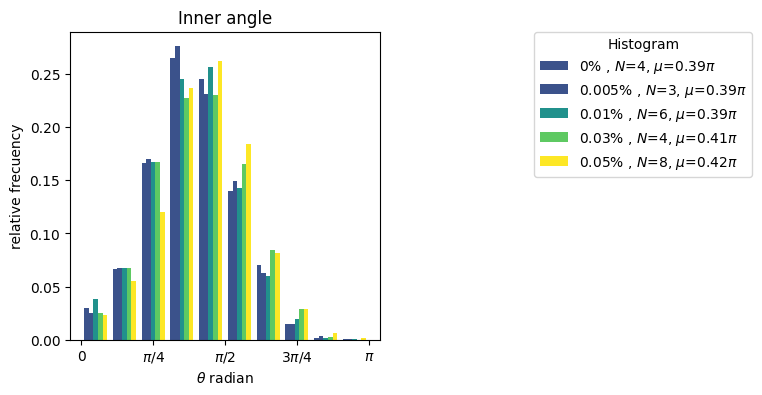

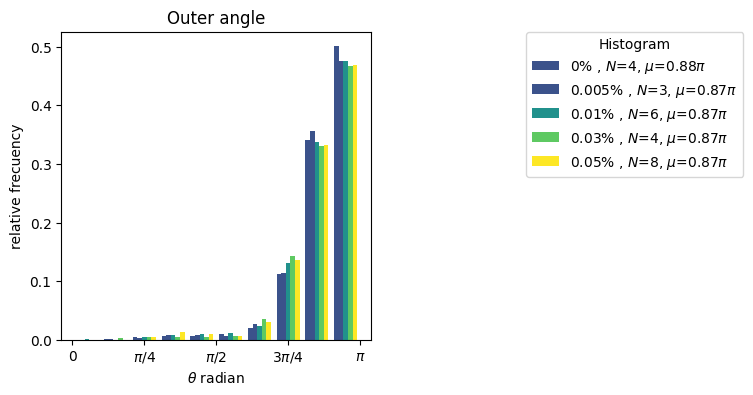

In [66]:
def func_pow(x,a,b):
    return a*x**(-b) #Under Flow Warning が出る

def func_exp(x,a,b):
    return a*np.exp(-b*x)

def func_log10(x,a,b): #func_powの対数変換
    return -b*np.log10(x)+np.log10(a)

def norm(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))
#Sorting data
unit=11/681

if os.path.exists("/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"):
    data_dir_path="/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"
elif os.path.exists("/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"):
    data_dir_path="/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"

data_list=glob.glob(str(data_dir_path) + "*")
data_kind_list=[os.path.basename(x) for x in data_list if not "img" in x]
print(data_kind_list)
order=[2,1,0,3]
tmp=copy.deepcopy(data_kind_list)
for i ,order in enumerate(order):
    tmp[i]=data_kind_list[order]
data_kind_list=tmp
print(data_kind_list)
# data_kind_list.append(data_kind_list[0])
# del data_kind_list[1:4],data_kind_list[0]

tmp=glob.glob(str(data_dir_path) + str(data_kind_list[0]) + "/*.dat")
name_list=[os.path.basename(x) for x in tmp]
sur_con_list=[x[9:-16] for x in name_list]
sur_con_list=list(set(sur_con_list))
print(sur_con_list)
order=[1,2,4,3,0]
tmp=copy.deepcopy(sur_con_list)
for i ,order in enumerate(order):
    tmp[i]=sur_con_list[order]
sur_con_list=tmp
print(sur_con_list)
# カラーマップを作成
cmap_hist = cm.get_cmap('viridis', 5)  # 'jet'カラーマップを5つの色で分割
cmap_fit = cm.get_cmap('jet', 5)  # 'jet'カラーマップを5つの色で分割

# 色を取得
colors_hist = cmap_hist(np.linspace(0.2, 0.8, 5))
colors_fit=cmap_fit(np.linspace(0.2, 0.8, 5))

# colors=["royalblue","gold","mediumseagreen","crimson","orchid"]
row=1
col=3
cutoff=1

for kind in data_kind_list:
    print(kind)
    Max=0
    total_data=[]
    label_data=[]
    relative_frecuency=[]
    weighted_relative_frecuency=[]
    mu_temp=[]
    mu=np.zeros(len(sur_con_list))
    sigma=np.zeros(len(sur_con_list))
    for target in sur_con_list:
        # 特定の文字列を持つファイル名を抽出
        target_files = [name for name in name_list if target in name]
        df=pd.DataFrame()
        N=len(target_files)
        for file in target_files:
            path=str(data_dir_path) + kind + "/" + file
            df_tmp=pd.read_csv(path)
            df=pd.concat([df,df_tmp],axis=0)
        data=df.iloc[:,0]
        
        if Max<max(data):
            Max=max(data)
            
        if "length" in kind:
            data=data[data>=cutoff]
            
        label=target+r" , $N$="+str(N)
        total_data.append(list(data))
        relative_frecuency.append(list(np.ones_like(data)/len(data)))
        weighted_relative_frecuency.append(list(data/sum(data)))
        # print(max(data),sum(data),max(data)/sum(data))
        label_data.append(label.replace("sur","%").replace("non","0"))
        mu_temp.append(pd.Series(data).mean())
    
        # sigma.append(pd.Series(data).std())
    for i in range(len(label_data)):
        label_data[i] += r", $\mu$=" +fr"{mu_temp[i]/np.pi:.2f}$\pi$"
    # if "length" in kind:
    #     fig , axes = plt.subplots(row,col,squeeze=False,tight_layout=True,figsize=(4*col+2,4))
    #     width=10
    #     range_set=int(Max-Max%width+width)
    #     bin_num=int(range_set/width)
        
    #     n_fr , bins_fr , patches_fr = axes[0,0].hist(total_data,bins=bin_num,density=False,label=label_data,color=colors,range=(0,range_set))
    #     # bin_log10=[math.pow(10,pow_i) for pow_i in np.log10(bins)]
    #     #相対度数
    #     n_refr , bins_refr , patches_refr =axes[0,1].hist(total_data,bins=bin_num,weights=relative_frecuency,range=(0,range_set),density=False,log=True,color=colors,alpha=0.7)
    #     Max_n=max([max(x) for x in n_refr])
        
    #     # #近似曲線計算
    #     # for i in range(len(total_data)):
    #     #     tmp = bins[:-1] + (bins[1] - bins[0])/2
    #     #     x=tmp[n[i]!=0]
    #     #     y=np.log10(n[i][n[i]!=0])
    #     #     params_lod10, covariance_log10 = curve_fit(func_log10,x,y)
    #     #     x_fit = np.linspace(min(x),max(x),100)
    #     #     y_fit = func_pow(x_fit, *params_lod10)
            
    #     #     axes[0,1].plot(x_fit, y_fit, label=f"fit_parm : a={params_lod10[0]:.3f}, b={params_lod10[1]:.3f}",color=colors[i])
    #     #     axes[0,1].legend(loc="upper right", fontsize=7,borderaxespad=0,title="Concentration")
        
    #     #重み付き相対度数
    #     n_wrefr , bins_wrefr , patches_wrefr = axes[0,2].hist(total_data,bins=bin_num,weights=weighted_relative_frecuency,range=(0,range_set),density=False,label=label_data,color=colors,log=True,alpha=0.7)
    #     # #近似曲線計算
    #     # for i in range(len(total_data)):
    #     #     tmp = bins[:-1] + (bins[1] - bins[0])/2
    #     #     x=tmp[n[i]!=0]
    #     #     y=np.log10(n[i][n[i]!=0])
    #     #     params_lod10, covariance_log10 = curve_fit(func_log10,x,y)
    #     #     x_fit = np.linspace(min(x),max(x),100)
    #     #     y_fit = func_pow(x_fit, *params_lod10)
            
    #     #     axes[0,2].plot(x_fit, y_fit, label=label_data[i]+f"_fit a={params_lod10[0]:.3f}, b={params_lod10[1]:.3f}",color=colors[i])

    #     for k in range(col):
    #         axes[0,k].set_xlabel(r"branch length without $r<$"+str(cutoff)+" (pix)")
    #         if k==2:
    #             axes[0,k].set_xscale("log")

    #     axes[0,0].set_ylabel("frecuency")
    #     axes[0,1].set_ylabel("relative_frecuency")
    #     axes[0,2].set_ylabel("weighted_relative_frecuency")
        
    #     axes[0,0].set_title(kind)
    #     axes[0,1].set_title(kind+"_relative_frecuency")
    #     axes[0,2].set_title(kind+"_weighted_relative_frecuency")
    #     plt.legend(bbox_to_anchor=(2.2, 1),loc="upper right", fontsize=10,borderaxespad=0,title="Concentration")

    if "angle" in kind:
        # fig , axes = plt.subplots(row,col-1,squeeze=False,tight_layout=True,figsize=(4*(col-1)+2,4))
        fig , axes = plt.subplots(1,1,squeeze=False,tight_layout=True,figsize=(4,4))
        # axes[0,0].hist(total_data,bins=10,range=(0,math.pi),label=label_data,rwidth=0.8,color=colors_hist,alpha=0.7)
        # #相対度数
        
        n , bins , patches = axes[0,0].hist(total_data,bins=10,weights=relative_frecuency,range=(0,math.pi),label=label_data,rwidth=0.8,color=colors_hist,alpha=1.0)
        #近似曲線計算
        for i in range(len(total_data)):
            shapiro_data=np.array(n[i])
            print(str(sur_con_list[i])+"_p : "+str(st.shapiro(shapiro_data)[1]))
            tmp = bins[:-1] + np.diff(bins)/2
            x=tmp[n[i]!=0]
            y=n[i][n[i]!=0]
            params, covariance = curve_fit(norm,x,y)
            x_fit = np.linspace(0,math.pi,100)
            y_fit = norm(x_fit, *params)
            mu[i]=params[1]
            sigma[i]=abs(params[2])
            print(r"b=\mu: "+str(mu[i]/np.pi)+r"$\pi$, c=\sigma: "+str(sigma[i]/np.pi)+r"$\pi$, a: "+str(params[0]),"mean:"+str(mu_temp[i]/np.pi))
            axes[0,0].plot(x_fit, y_fit, label=sur_con_list[i].replace("sur","%").replace("non","0")+r"  $\mu$=" +fr"{mu[i]/np.pi:.2f}$\pi$",color=colors_fit[i],linewidth=3)
            # axes[0,1].vlines( mu[i], 0,ymax=0.3, color=colors[i], linewidth=1 )
        
        # for k in range(col-1):
        for k in range(1):
            axes[0,k].set_xticks([0, np.pi/4, np.pi/2, np.pi*3/4, np.pi],
                                    ["0", r"$\pi$/4", r"$\pi$/2", r"3$\pi$/4", r"$/pi$"])
            axes[0,k].set_xlabel(r"$/theta$ radian")
        if kind=="Vector_angle":
            kind="Inner angle"
        else:
            kind="Outer angle"
        axes[0,0].set_title(kind)
        # axes[0,1].set_title(kind)
        axes[0,0].set_ylabel("relative frecuency")
        # axes[0,1].set_ylabel("relative_frecuency")
        plt.legend(bbox_to_anchor=(2.2, 1),loc="upper right", fontsize=10,borderaxespad=0,title="Histogram")
    else:
        continue
    # os.makedirs(str(data_dir_path) + "/result_img/",exist_ok=True)
    # plt.savefig(str(data_dir_path) + "/result_img/" + kind + ".pdf")
    # plt.savefig(str(data_dir_path) + "/result_img/" + kind + ".png")
plt.show()



['nonsur', '0.005sur', '0.01sur', '0.03sur', '0.05sur']


/tmp/ipykernel_1108355/1682627511.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_plot = cm.get_cmap('jet', 5)  # 'jet'カラーマップを5つの色で分割


97
    #time       #rmax  #area  #number_of_branch  #branch_mean  #branch_median
0       0    4.123106      8                  4      2.500000             2.5
1      15   31.064449    234                  6      3.500000             3.0
2      30   33.541020    331                 12      2.500000             2.5
3      45   36.345564    407                  9      2.777778             3.0
4      60   39.319207    509                 13      3.076923             3.0
..    ...         ...    ...                ...           ...             ...
92   1380  199.150697  18498                 30      2.100000             2.0
93   1395  201.099478  18915                 26      2.000000             2.0
94   1410  203.273215  19418                 23      1.739130             1.0
95   1425  205.231577  19796                  9      1.222222             1.0
96   1440  205.231577  19964                  9      1.222222             1.0

[97 rows x 6 columns]
120
     #time       #rmax  #area  #nu

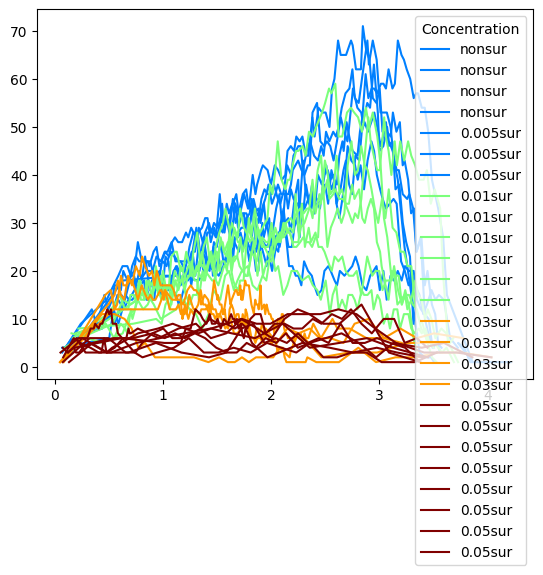

In [26]:
#reading data
if os.path.exists("/mnt/d/dendrite_data/edited_data/analisys_data"):
    data_dir_path="/mnt/d/dendrite_data/edited_data/analisys_data"
elif os.path.exists("/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"):
    data_dir_path="/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"

data_list=glob.glob(str(data_dir_path) + "/*")
sur_con_list=[os.path.basename(data_list[i]).split("_")[1] for i in range(len(data_list))]
sur_con_list=list(set(sur_con_list))
sur_con_list.sort()
sur_con_list.insert(0,sur_con_list.pop(-1))
print(sur_con_list)

#plot data
fig, ax = plt.subplots()
unit=11/681 #単位はcm/pix
# カラーマップを作成
cmap_plot = cm.get_cmap('jet', 5)  # 'jet'カラーマップを5つの色で分割
# 色を取得
colors_plot=cmap_plot(np.linspace(0.2, 0.8, 5))

for sur_i ,surfactant in enumerate(sur_con_list):
    df_ave=pd.DataFrame()
    df_rmax=pd.DataFrame()
    df_branch=pd.DataFrame()
    for i in range(len(data_list)):
        if surfactant in data_list[i]:
            df=pd.read_table(data_list[i])
            df_rmax=pd.concat([df_rmax,df.iloc[:,1]],axis=0)
            df_branch=pd.concat([df_branch,df.iloc[:,3]],axis=0)
            ax.plot(df.iloc[:,1]*unit,df.iloc[:,3],color=colors_plot[sur_i], label=surfactant)
            df_ave=pd.concat([df_ave,df],axis=0)
    print(df_ave)



# #表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median
# unit=11/681 #単位はcm/pix
# i=1
# j=3
# fig, ax = plt.subplots()
# for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
#     ax.plot(fl[k][:,i]*unit,fl[k][:,j],color="r", label="")
# ax.plot(fl[3][:,i]*unit,fl[3][:,j],color="r", label="non")
# plt.legend()

# for k in [4,5,6]: #0.005%sur
#     ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="orange", label="")
# ax.plot(fl[4][:,i]*unit,fl[4][:,j],color="orange", label="0.005%")
# plt.legend()

# for k in [7,8,12,13,17,18]: #0.01%sur
#     ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="gold", label="")
# ax.plot(fl[7][:,i]*unit,fl[7][:,j],color="gold", label="0.01%")
# plt.legend()

# for k in [21,22,23,24]: #0.03%sur
#     ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="m", label="",alpha=0)#透明化
# #ax.plot(fl[21][:,i]*unit,fl[21][:,j],color="m", label="0.03%",alpha=0)
# plt.legend()

# for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
#     ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="k", label="",alpha=0)
# #ax.plot(fl[1][:,i]*unit,fl[1][:,j],color="k", label="0.05%",alpha=0)
# plt.legend()



# ax.set_xlabel(label[i])
# ax.set_ylabel(label[j])
        

plt.legend(title="Concentration")
plt.show()

['nonsur', '0.005sur', '0.01sur', '0.03sur', '0.05sur']


/tmp/ipykernel_1108355/1471132697.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_plot = cm.get_cmap('viridis', 5)  # 'jet'カラーマップを5つの色で分割


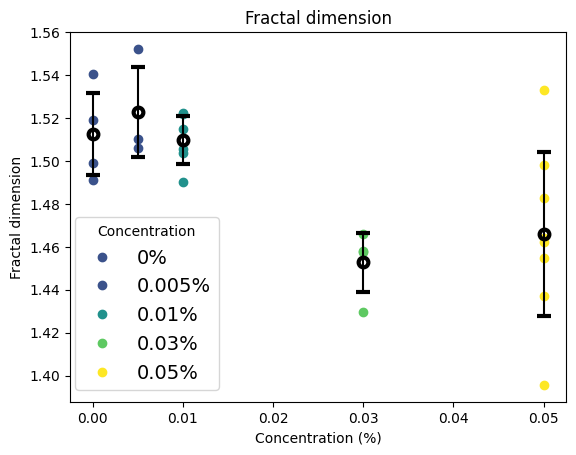

In [54]:
#reading data
if os.path.exists("/mnt/d/dendrite_data/edited_data/housedolf_dim_data"):
    data_dir_path="/mnt/d/dendrite_data/edited_data/housedolf_dim_data"
elif os.path.exists("/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"):
    data_dir_path="/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"

data_list=glob.glob(str(data_dir_path) + "/*")
sur_con_list=[os.path.basename(data_list[i]).split("_")[1] for i in range(len(data_list))]
sur_con_list=list(set(sur_con_list))
sur_con_list.sort()
sur_con_list.insert(0,sur_con_list.pop(-1))
print(sur_con_list)
x_list=[float(sur_con_list[i].replace("sur","").replace("non","0")) for i in range(len(sur_con_list))]

#plot data
fig, ax = plt.subplots()
unit=11/681 #単位はcm/pix
# カラーマップを作成
cmap_plot = cm.get_cmap('viridis', 5)  # 'jet'カラーマップを5つの色で分割
# 色を取得
colors_plot=cmap_plot(np.linspace(0.2, 0.8, 5))

for sur_i ,surfactant in enumerate(sur_con_list):
    df=pd.DataFrame()
    x=[]
    y=[]
    for i in range(len(data_list)):
        if surfactant in data_list[i]:
            df=pd.read_table(data_list[i])
            Housedolf_dim=df.iloc[:,1]
            df['Housedolf_dim_ma'] = df['#Housedolf_dim'].rolling(window=5, min_periods=1).mean()
            x.append(x_list[sur_i])
            y.append(df.iloc[-1,2])

    x=np.array(x)
    y=np.array(y)
    y_ave=np.average(y)
    y_err_sd=y.std()
    ax.plot(x,y,"o",ls="",c=colors_plot[sur_i],label=surfactant.replace("sur","%").replace("non","0"))
    ax.errorbar(x[0],y_ave,yerr=y_err_sd,capsize=5, fmt='o', ecolor="k", ms=7, mfc='None', mec='k',mew=3)
    

ax.set_xlabel("Concentration (%)")
ax.set_ylabel("Fractal dimension")
ax.set_title("Fractal dimension")

plt.legend(title="Concentration",bbox_to_anchor=(0.3, 0.5), fontsize=14,borderaxespad=0)
plt.show()


['Edited_vector_length', 'Vector_angle', 'Vector_length', 'Vector_outer_angle']
['Vector_length', 'Vector_angle', 'Edited_vector_length', 'Vector_outer_angle']
['0.01sur', '0.05sur', '0.005sur', '0.03sur', 'nonsur']
['nonsur', '0.005sur', '0.01sur', '0.03sur', '0.05sur']
Edited_vector_length


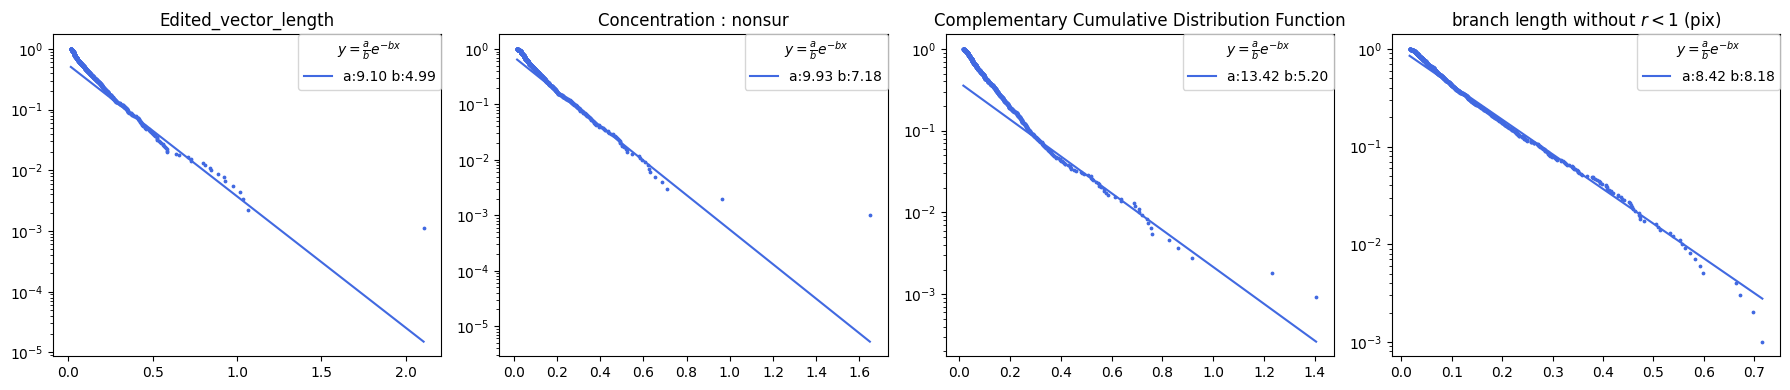

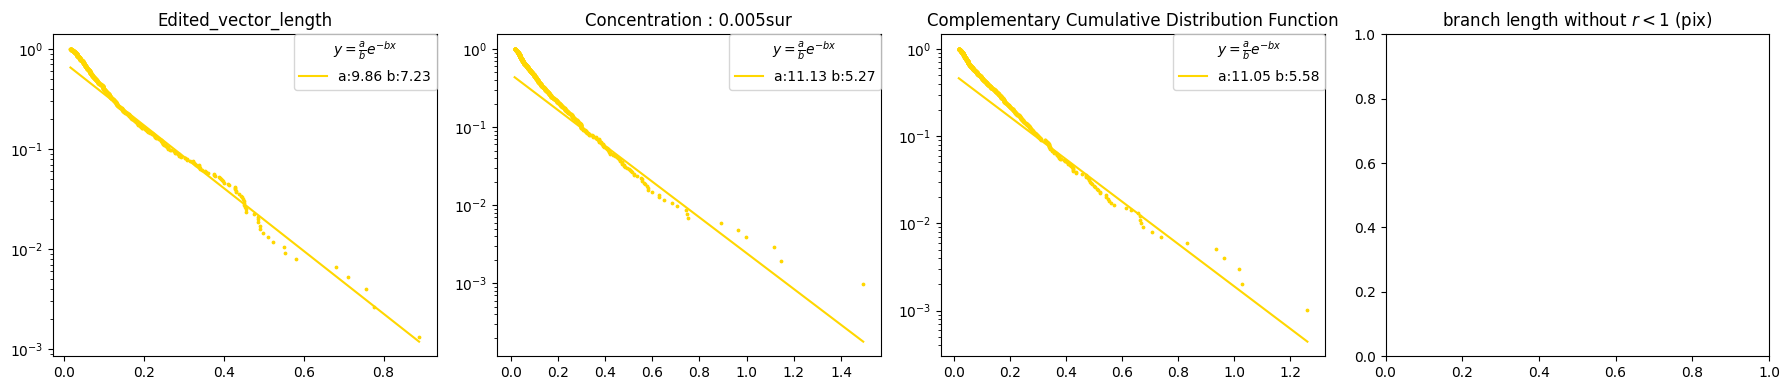

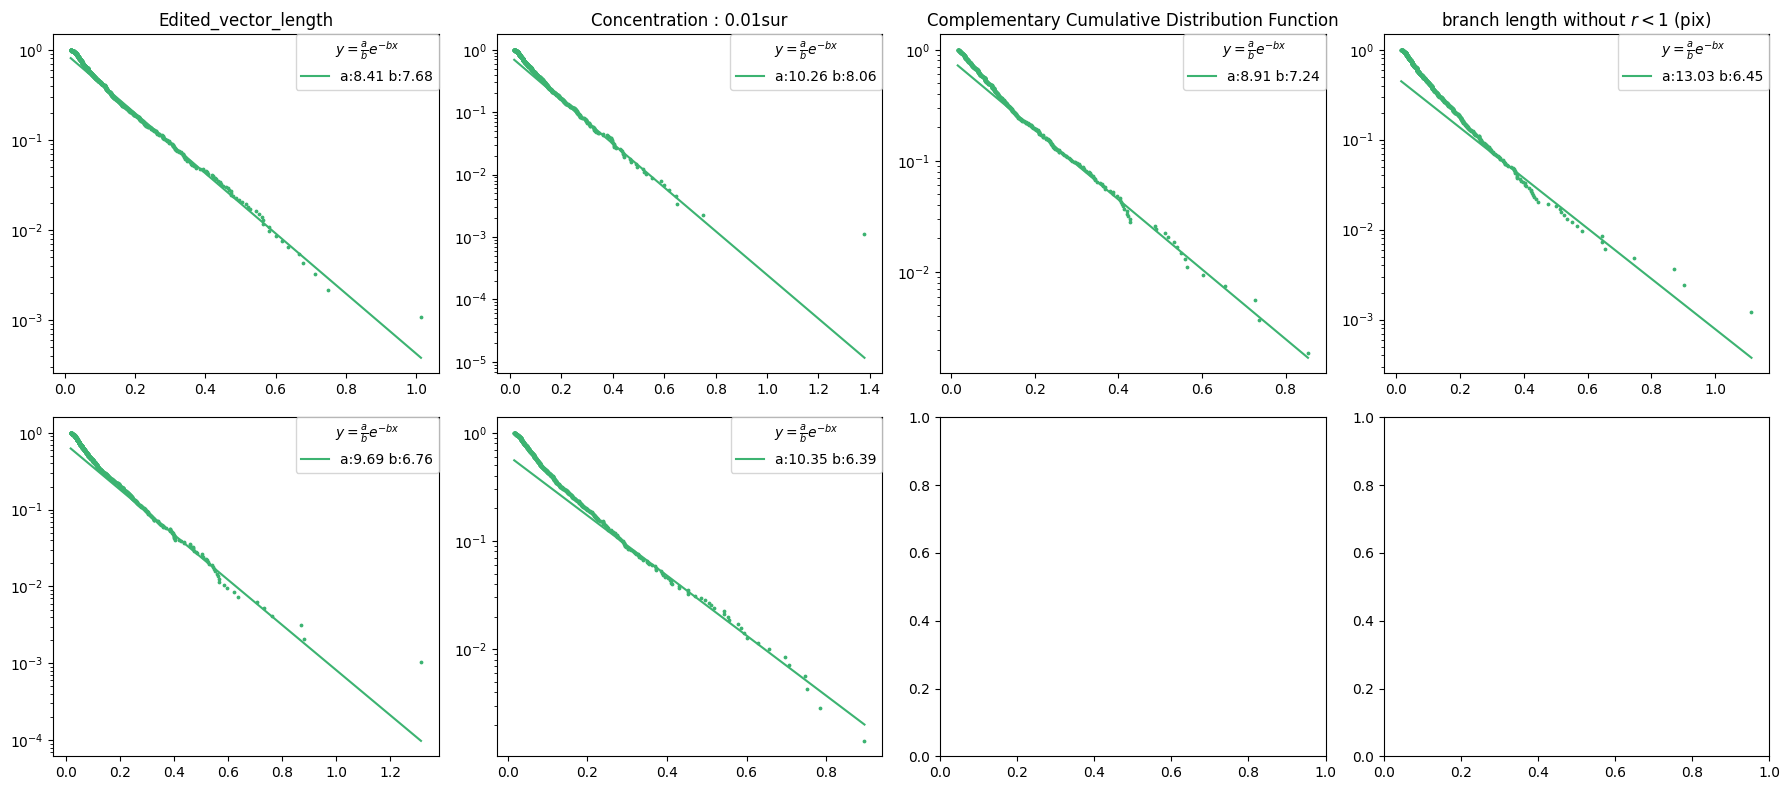

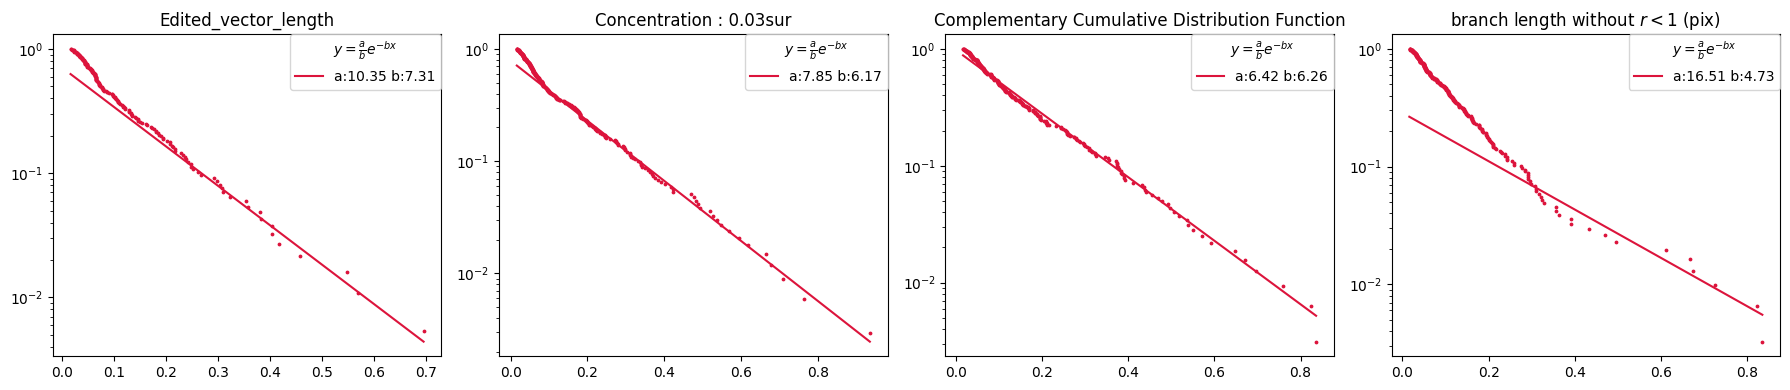

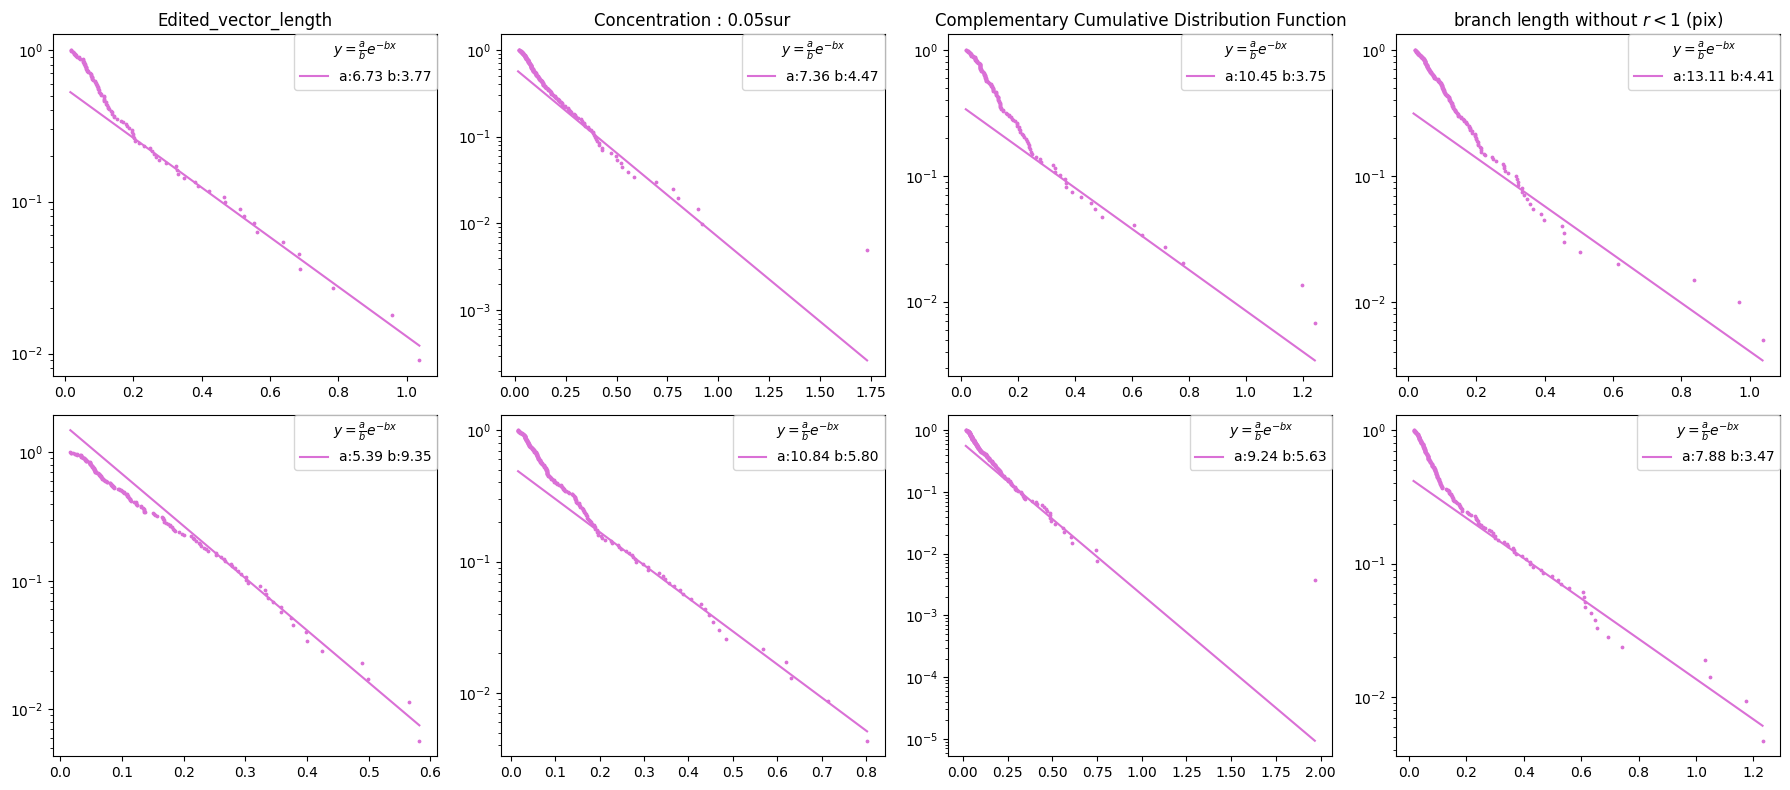

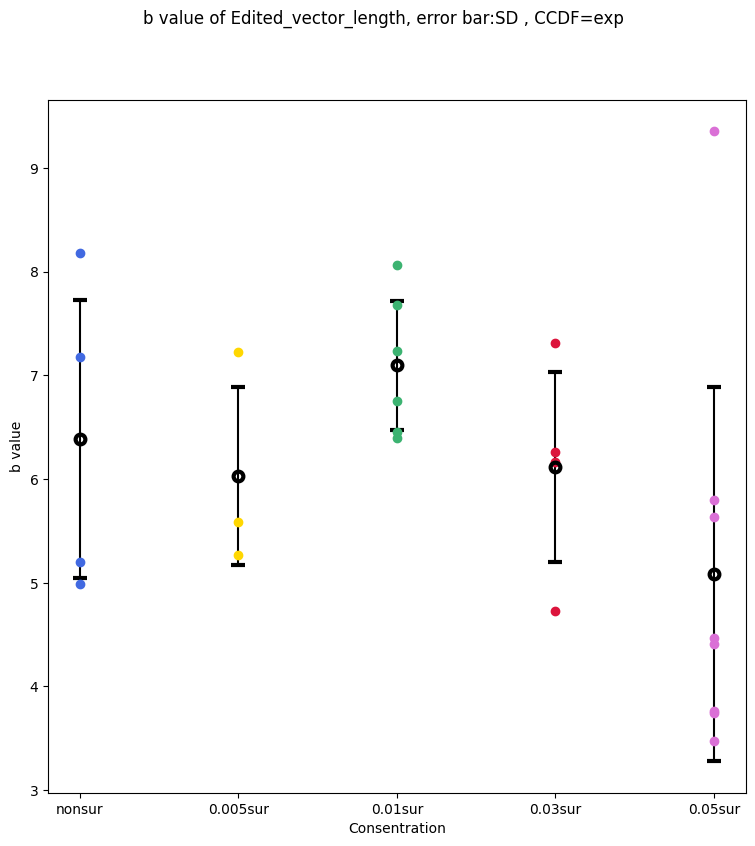

In [83]:
def CDF_pow(x,a,b): #Cumulative Distribution Function(累積分布関数)
    return a/(b-1)*(1-x**(-b+1))

def CDF_exp(x,b):
    return 1-np.exp(-b*(x-1))

def CCDF_exp(x,a,b): #Complementary Cumulative Distribution Function(相補累積分布関数)
    return b/a*np.exp(-b*x)

def CCDF_exp_log(x,a,b):
    with np.errstate(invalid='ignore'):
        return np.log(b/a)-b*x

def CCDF_pow(x,a,b):
    return a/(b-1)*x**(-b+1)

# def CCDF_pow(x,b):
#     return x**(-b+1)

def CCDF_pow_log(x,a,b): #x->logxを入れる
    return np.log(a/(b-1))+(-b+1)*x

# def CCDF_pow_log(x,b): #x->logxを入れる
#     return (-b+1)*x

#read data
unit=11/681

if os.path.exists("/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"):
    data_dir_path="/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"
elif os.path.exists("/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"):
    data_dir_path="/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"

data_list=glob.glob(data_dir_path + "*")
data_kind_list=[os.path.basename(x) for x in data_list if not "img" in x]
print(data_kind_list)
order=[2,1,0,3]
tmp=copy.deepcopy(data_kind_list)
for i ,order in enumerate(order):
    tmp[i]=data_kind_list[order]
data_kind_list=tmp
print(data_kind_list)

tmp=glob.glob(data_dir_path+data_kind_list[0]+"/*.dat")
name_list=[os.path.basename(x) for x in tmp]
sur_con_list=[x[9:-16] for x in name_list]
sur_con_list=list(set(sur_con_list))
print(sur_con_list)
order=[4,2,0,3,1]
tmp=copy.deepcopy(sur_con_list)
for i ,order in enumerate(order):
    tmp[i]=sur_con_list[order]
sur_con_list=tmp
print(sur_con_list)
colors=["royalblue","gold","mediumseagreen","crimson","orchid"]

cutoff=1
a_list=[[] for i in range(len(sur_con_list))]
b_list=[[] for i in range(len(sur_con_list))]
name='Edited_vector_length'

for kind in data_kind_list :
    if name in kind:
        print(kind)
        for target_i , target in enumerate(sur_con_list):
            # 特定の文字列を持つファイル名を抽出(濃度ごと)
            target_files = [name for name in name_list if target in name]
            N_tg=len(target_files)
            row=int((N_tg-1)/4)+1
            col=4
            pic_count=0
            Max=0
            fig , axes = plt.subplots(row,col,squeeze=False,tight_layout=True,figsize=(4*col+2,4*row))

            #グラフの描画
            for file in target_files:
                path=data_dir_path+kind+"/"+file
                data=pd.read_csv(path)
                data=data[data>=cutoff]
                data=data.dropna()
                data=data.iloc[:,0]*unit
                pic_row=int((pic_count)/4)
                pic_col=(pic_count)%4
                N_data=len(data)

                #相補累積分布関数
                axes[0,2].set_title("relative_frecuency")
                sx=sorted(data)
                sy=[1-i/N_data for i in range(N_data)]
                axes[pic_row,pic_col].scatter(sx,sy,color=colors[target_i],s=3)
                x_min=[5*i for i in range(1,int(max(sx)/5))]

                # 近似曲線計算
                # #DCF=pow
                # fitting_range=[16,max(data)*0.9]
                # x=[sx for sx in sx if sx>= fitting_range[0]]
                # y=[sy[i] for i in range(len(sy)-len(x),len(sy))]
                # x=[x for x in x if x<= fitting_range[1]]
                # y=[y[i] for i in range(0,len(x))]
                # x_log=np.log(x)
                # y_log=np.log(y)
                # params_defo=[1.0,2.0]
                # params_pow, _ = curve_fit(CCDF_pow_log,x_log,y_log,p0=params_defo)
                # x_fit = np.linspace(3,max(sx),100)
                # y_fit = CCDF_pow(x_fit, *params_pow)
                # axes[pic_row,pic_col].plot(x_fit, y_fit,color=colors[target_i],label=r"a:"+f"{params_pow[0]:.2f}"+r" b:"+f"{params_pow[1]:.2f}")
                # # axes[pic_row,pic_col].plot(x_fit, y_fit,color=colors[target_i],label=r" b:"+f"{params_pow[0]:.2f}")
                # # b_list[target_i].append(params_pow[0])
                # axes[pic_row,pic_col].legend(loc="upper left", fontsize=10,borderaxespad=0,title=r"$y=\frac{a}{b-1}x^{-b+1}$")
                # axes[pic_row,pic_col].set_xscale("log")
                # axes[pic_row,pic_col].set_yscale("log")
                # a_list[target_i].append(params_pow[0])
                # b_list[target_i].append(params_pow[1])
                    
                #DCF=exp
                fitting_range=[16*unit,max(data)*0.9]
                x=[sx for sx in sx if sx>= fitting_range[0]]
                y=[sy[i] for i in range(len(sy)-len(x),len(sy))]
                x=[x for x in x if x<= fitting_range[1]]
                y=[y[i] for i in range(0,len(x))]
                log_y=np.log(y)
                params_exp=[0.5,0.2]
                params_exp, _ = curve_fit(CCDF_exp_log,x,log_y)
                x_fit = np.linspace(1*unit,max(sx),100)
                y_fit = CCDF_exp(x_fit, *params_exp)
                axes[pic_row,pic_col].plot(x_fit, y_fit,color=colors[target_i],label=r"a:"+f"{params_exp[0]:.2f}"+r" b:"+f"{params_exp[1]:.2f}")
                axes[pic_row,pic_col].legend(loc="upper right", fontsize=10,borderaxespad=0,title=r"$y=\frac{a}{b}e^{-bx}$")
                axes[pic_row,pic_col].set_yscale("log")
                a_list[target_i].append(params_exp[0])
                b_list[target_i].append(params_exp[1])
                
                axes[0,2].set_title("Complementary Cumulative Distribution Function")
                axes[0,0].set_title(kind)
                axes[0,1].set_title("Concentration : " + target)
                axes[0,3].set_title(r"branch length without $r<$"+str(cutoff)+" (pix)")

                # os.makedirs(data_dir_path+"/each_result_img/",exist_ok=True)
                # plt.savefig(data_dir_path+"/each_result_img/" + str(kind) + "_" + str(target) +".pdf")
                # plt.savefig(data_dir_path+"/each_result_img/" + str(kind) + "_" + str(target) + ".png")
                pic_count+=1
plt.show()

fig,ax=plt.subplots(1,1,figsize=(9,9)) 
# ax.set_title=("b value, error bar:SD")
for sur_i , surfactant in enumerate(sur_con_list):
    x_b=np.full(len(b_list[sur_i]),sur_con_list[sur_i])
    y_b=np.array(b_list[sur_i])
    y_b_ave=np.average(y_b)
    y_b_err_sd=y_b.std()
    
    ax.errorbar(x_b[0],y_b_ave,yerr=y_b_err_sd,capsize=5, fmt='o', ecolor='k', ms=7, mfc='None', mec='k',mew=3)
    ax.plot(x_b,y_b,"o",ls="",c=colors[sur_i])
    ax.set_xlabel("Consentration")
    ax.set_ylabel("b value")

# name='Vector_length'
fig.suptitle("b value of " + name + ", error bar:SD , CCDF=exp ")
# os.makedirs(data_dir_path+"/each_result_img/",exist_ok=True)
# plt.savefig(data_dir_path+"/each_result_img/fit_value_" + name +".pdf")
# plt.savefig(data_dir_path+"/each_result_img/fit_value_" + name + ".png")
plt.show()

['Edited_vector_length', 'Vector_angle', 'Vector_length', 'Vector_outer_angle']
['Vector_length', 'Vector_angle', 'Edited_vector_length', 'Vector_outer_angle']
['0.01sur', '0.05sur', '0.005sur', '0.03sur', 'nonsur']
['nonsur', '0.005sur', '0.01sur', '0.03sur', '0.05sur']
Vector_length


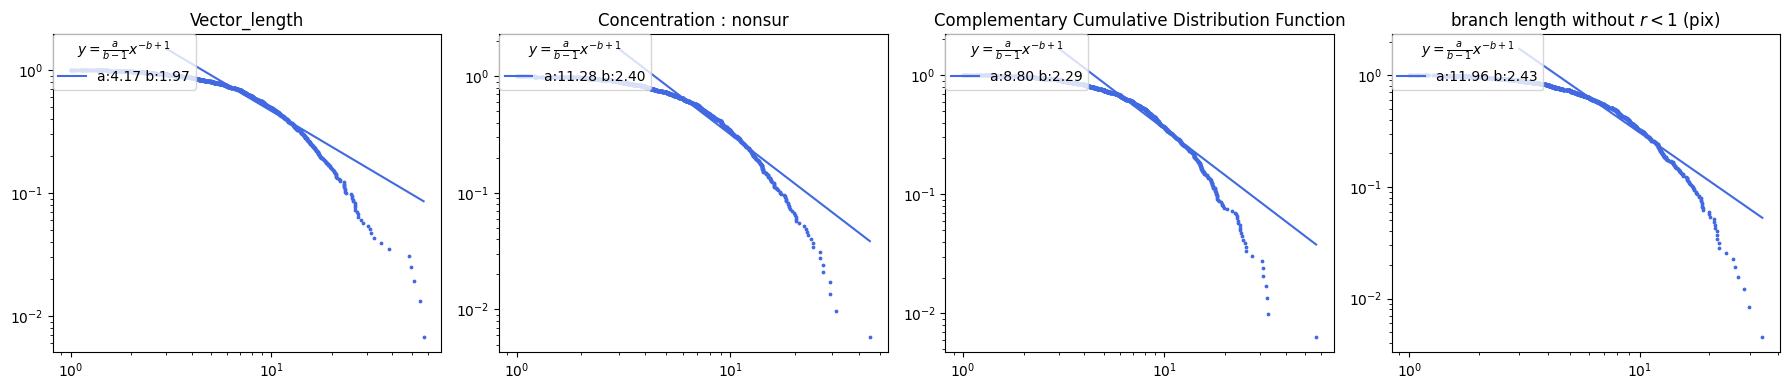

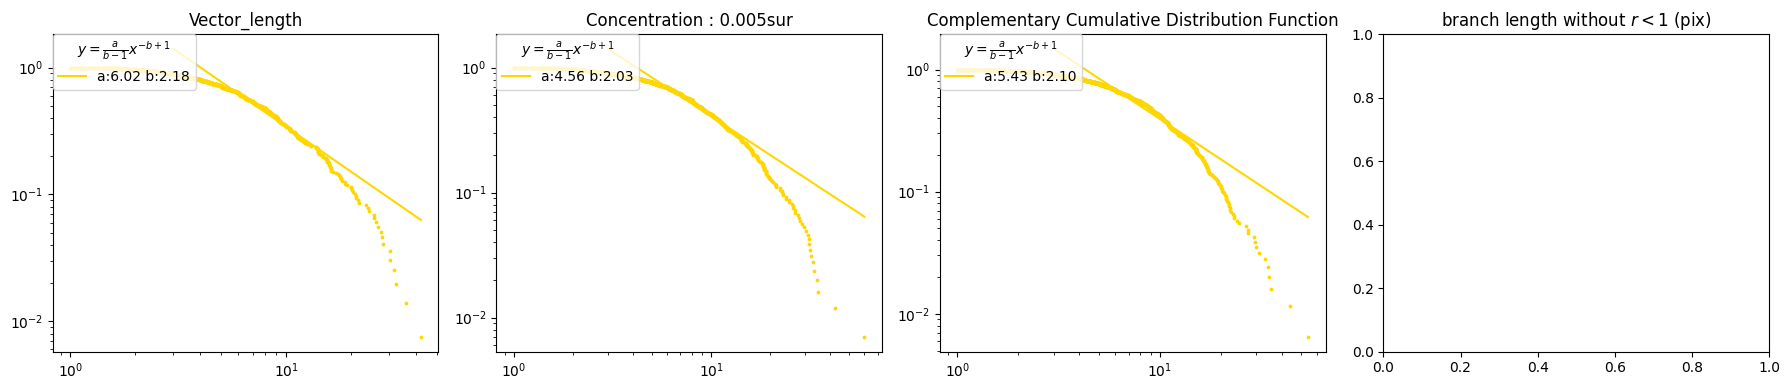

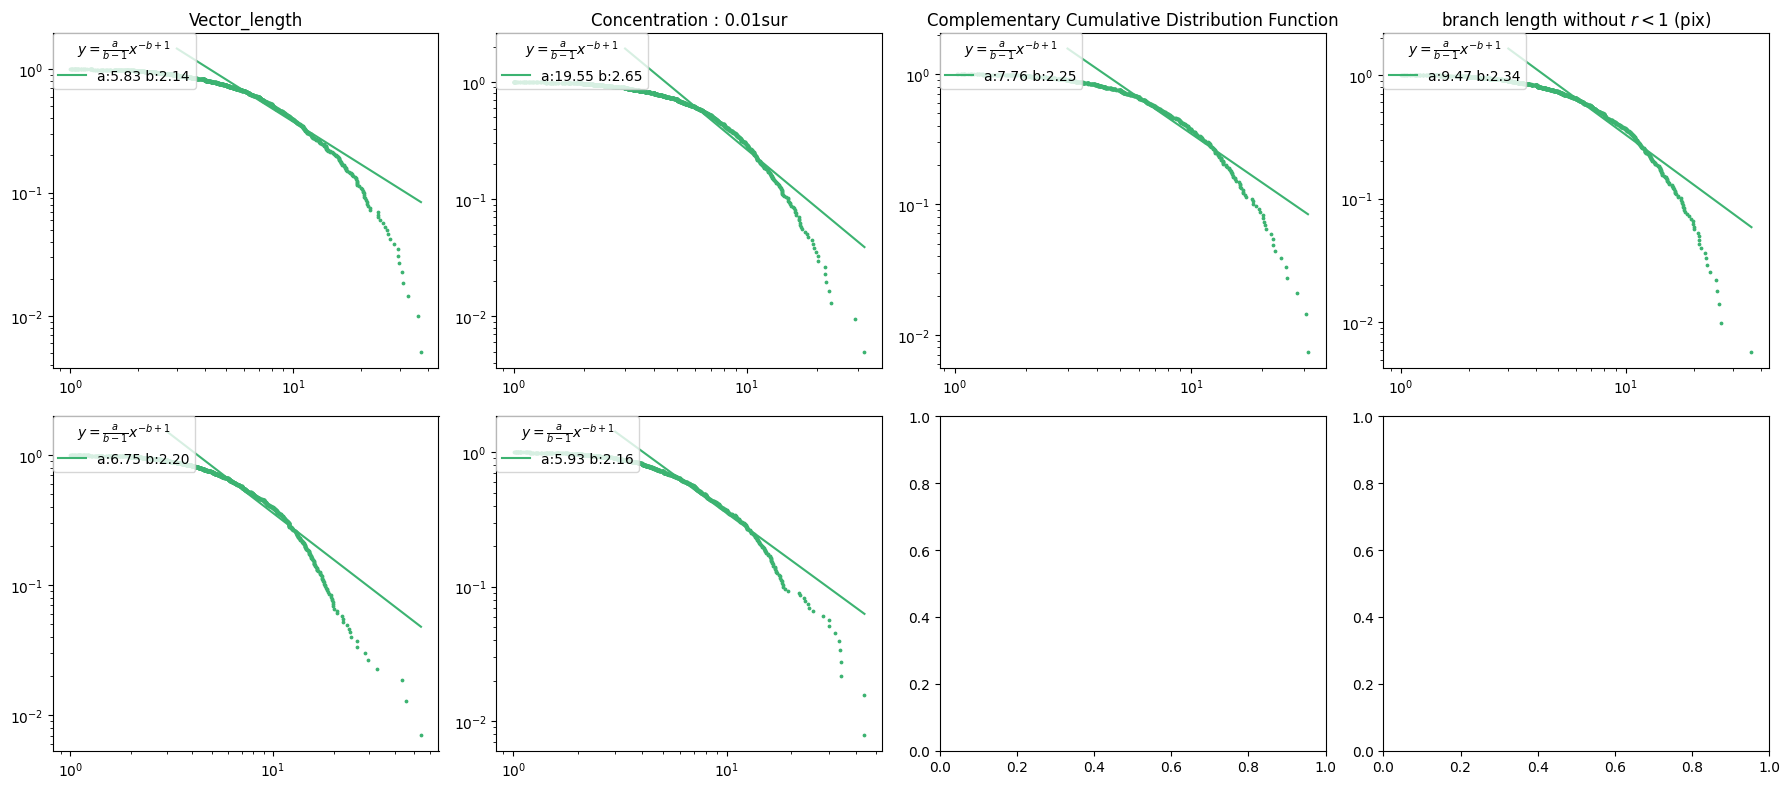

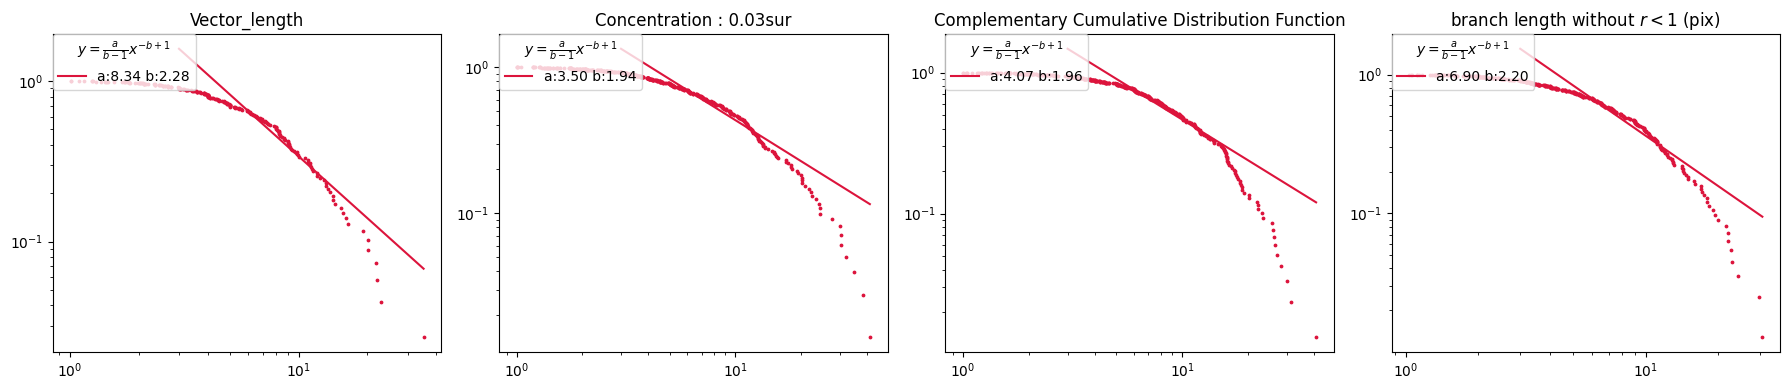

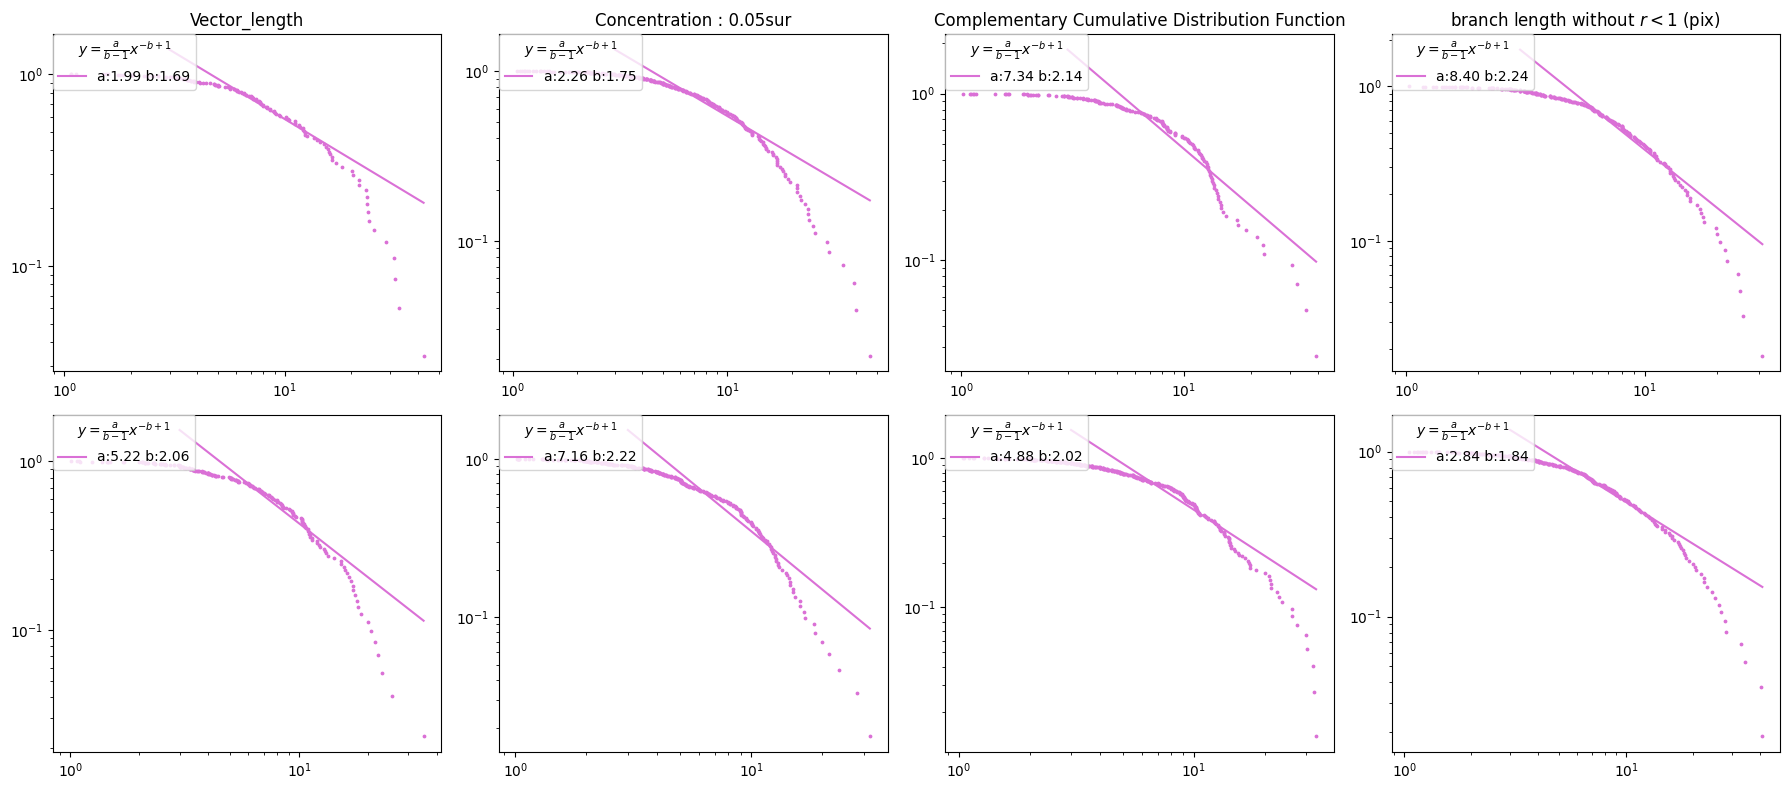

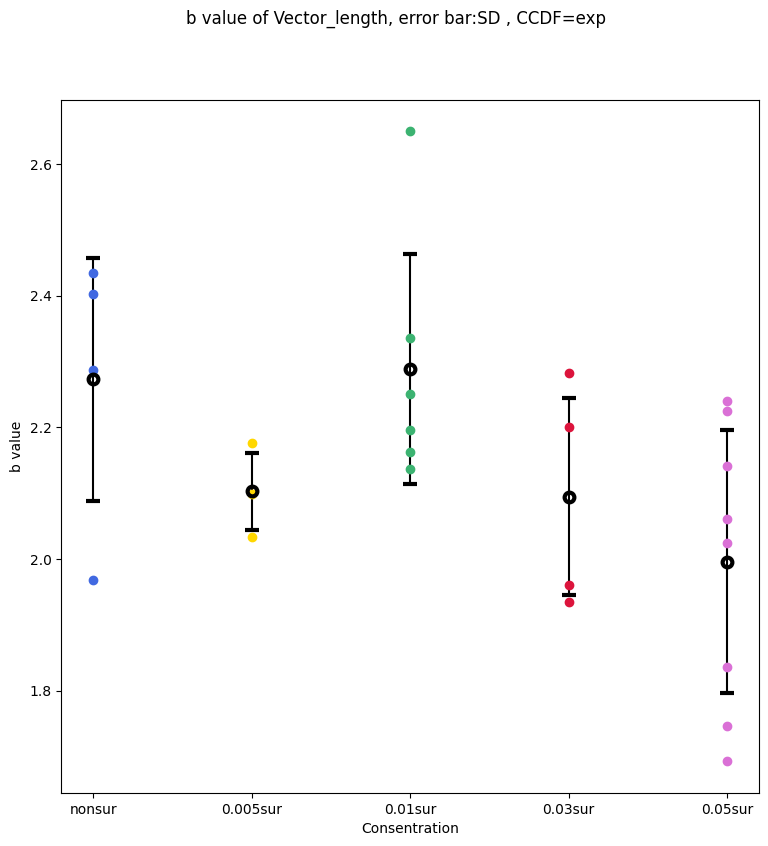

In [81]:
def CDF_pow(x,a,b): #Cumulative Distribution Function(累積分布関数)
    return a/(b-1)*(1-x**(-b+1))

def CDF_exp(x,b):
    return 1-np.exp(-b*(x-1))

def CCDF_exp(x,a,b): #Complementary Cumulative Distribution Function(相補累積分布関数)
    return b/a*np.exp(-b*x)

def CCDF_exp_log(x,a,b):
    with np.errstate(invalid='ignore'):
        return np.log(b/a)-b*x

def CCDF_pow(x,a,b):
    return a/(b-1)*x**(-b+1)

# def CCDF_pow(x,b):
#     return x**(-b+1)

def CCDF_pow_log(x,a,b): #x->logxを入れる
    return np.log(a/(b-1))+(-b+1)*x

# def CCDF_pow_log(x,b): #x->logxを入れる
#     return (-b+1)*x

#read data
unit=11/681

if os.path.exists("/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"):
    data_dir_path="/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"
elif os.path.exists("/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"):
    data_dir_path="/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"

data_list=glob.glob(data_dir_path + "*")
data_kind_list=[os.path.basename(x) for x in data_list if not "img" in x]
print(data_kind_list)
order=[2,1,0,3]
tmp=copy.deepcopy(data_kind_list)
for i ,order in enumerate(order):
    tmp[i]=data_kind_list[order]
data_kind_list=tmp
print(data_kind_list)

tmp=glob.glob(data_dir_path+data_kind_list[0]+"/*.dat")
name_list=[os.path.basename(x) for x in tmp]
sur_con_list=[x[9:-16] for x in name_list]
sur_con_list=list(set(sur_con_list))
print(sur_con_list)
order=[4,2,0,3,1]
tmp=copy.deepcopy(sur_con_list)
for i ,order in enumerate(order):
    tmp[i]=sur_con_list[order]
sur_con_list=tmp
print(sur_con_list)
colors=["royalblue","gold","mediumseagreen","crimson","orchid"]

cutoff=1
a_list=[[] for i in range(len(sur_con_list))]
b_list=[[] for i in range(len(sur_con_list))]
name='Vector_length'

for kind in data_kind_list :
    if name in kind:
        print(kind)
        for target_i , target in enumerate(sur_con_list):
            # 特定の文字列を持つファイル名を抽出(濃度ごと)
            target_files = [name for name in name_list if target in name]
            N_tg=len(target_files)
            row=int((N_tg-1)/4)+1
            col=4
            pic_count=0
            Max=0
            fig , axes = plt.subplots(row,col,squeeze=False,tight_layout=True,figsize=(4*col+2,4*row))

            #グラフの描画
            for file in target_files:
                path=data_dir_path+kind+"/"+file
                data=pd.read_csv(path)
                data=data[data>=cutoff]
                data=data.dropna()
                data=data.iloc[:,0]
                pic_row=int((pic_count)/4)
                pic_col=(pic_count)%4
                N_data=len(data)
                data_sum=sum(data)

                #相補累積分布関数
                axes[0,2].set_title("weighted_relative_frecuency")
                sx=sorted(data)
                sy=[1-sum(sx[0:i])/data_sum for i in range(N_data)]
                axes[pic_row,pic_col].scatter(sx,sy,color=colors[target_i],s=3)
                x_min=[5*i for i in range(1,int(max(sx)/5))]

                # 近似曲線計算
                #CCDF=pow
                fitting_range=[5,16]
                x=[sx for sx in sx if sx>= fitting_range[0]]
                y=[sy[i] for i in range(len(sy)-len(x),len(sy))]
                x=[x for x in x if x<= fitting_range[1]]
                y=[y[i] for i in range(0,len(x))]
                x_log=np.log(x)
                y_log=np.log(y)
                params_defo=[1.0,2.0]
                params_pow, _ = curve_fit(CCDF_pow_log,x_log,y_log,p0=params_defo)
                x_fit = np.linspace(3,max(sx),100)
                y_fit = CCDF_pow(x_fit, *params_pow)
                axes[pic_row,pic_col].plot(x_fit, y_fit,color=colors[target_i],label=r"a:"+f"{params_pow[0]:.2f}"+r" b:"+f"{params_pow[1]:.2f}")
                # axes[pic_row,pic_col].plot(x_fit, y_fit,color=colors[target_i],label=r" b:"+f"{params_pow[0]:.2f}")
                # b_list[target_i].append(params_pow[0])
                axes[pic_row,pic_col].legend(loc="upper left", fontsize=10,borderaxespad=0,title=r"$y=\frac{a}{b-1}x^{-b+1}$")
                axes[pic_row,pic_col].set_xscale("log")
                axes[pic_row,pic_col].set_yscale("log")
                a_list[target_i].append(params_pow[0])
                b_list[target_i].append(params_pow[1])
                    
                # # #DCF=exp
                # fitting_range=[5,16]
                # x=[sx for sx in sx if sx>= fitting_range[0]]
                # y=[sy[i] for i in range(len(sy)-len(x),len(sy))]
                # x=[x for x in x if x<= fitting_range[1]]
                # y=[y[i] for i in range(0,len(x))]
                # log_y=np.log(y)
                # params_exp=[0.5,0.2]
                # params_exp, _ = curve_fit(CCDF_exp_log,x,log_y)
                # x_fit = np.linspace(1,max(sx),100)
                # y_fit = CCDF_exp(x_fit, *params_exp)
                # axes[pic_row,pic_col].plot(x_fit, y_fit,color=colors[target_i],label=r"a:"+f"{params_exp[0]:.2f}"+r" b:"+f"{params_exp[1]:.2f}")
                # axes[pic_row,pic_col].legend(loc="upper right", fontsize=10,borderaxespad=0,title=r"$y=\frac{a}{b}e^{-bx}$")
                # axes[pic_row,pic_col].set_yscale("log")
                # a_list[target_i].append(params_exp[0])
                # b_list[target_i].append(params_exp[1])
                
                axes[0,2].set_title("Complementary Cumulative Distribution Function")
                axes[0,0].set_title(kind)
                axes[0,1].set_title("Concentration : " + target)
                axes[0,3].set_title(r"branch length without $r<$"+str(cutoff)+" (pix)")
                # axes[pic_row,pic_col].set_xscale("log")
                # axes[pic_row,pic_col].set_yscale("log")
                
                # os.makedirs(data_dir_path+"/each_result_img/",exist_ok=True)
                # plt.savefig(data_dir_path+"/each_result_img/" + str(kind) + "_" + str(target) +".pdf")
                # plt.savefig(data_dir_path+"/each_result_img/" + str(kind) + "_" + str(target) + ".png")
                pic_count+=1
plt.show()

fig,ax=plt.subplots(1,1,figsize=(9,9)) 
# ax.set_title=("b value, error bar:SD")
for sur_i , surfactant in enumerate(sur_con_list):
    x_b=np.full(len(b_list[sur_i]),sur_con_list[sur_i])
    y_b=np.array(b_list[sur_i])
    y_b_ave=np.average(y_b)
    y_b_err_sd=y_b.std()
    
    ax.errorbar(x_b[0],y_b_ave,yerr=y_b_err_sd,capsize=5, fmt='o', ecolor='k', ms=7, mfc='None', mec='k',mew=3)
    ax.plot(x_b,y_b,"o",ls="",c=colors[sur_i])
    ax.set_xlabel("Consentration")
    ax.set_ylabel("b value")

# name='Vector_length'
fig.suptitle("b value of " + name + ", error bar:SD , CCDF=exp ")
# os.makedirs(data_dir_path+"/each_result_img/",exist_ok=True)
# plt.savefig(data_dir_path+"/each_result_img/fit_value_" + name +".pdf")
# plt.savefig(data_dir_path+"/each_result_img/fit_value_" + name + ".png")
plt.show()

['Edited_vector_length', 'Vector_angle', 'Vector_length', 'Vector_outer_angle']
['Vector_length', 'Vector_angle', 'Edited_vector_length', 'Vector_outer_angle']
['0.01sur', '0.05sur', '0.005sur', '0.03sur', 'nonsur']
['nonsur', '0.005sur', '0.01sur', '0.03sur', '0.05sur']
Vector_length


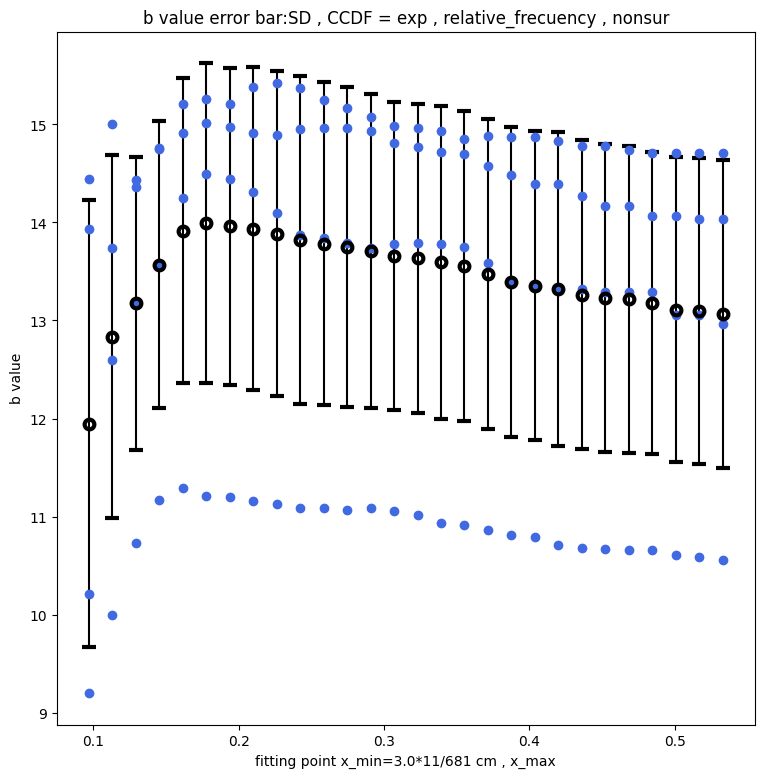

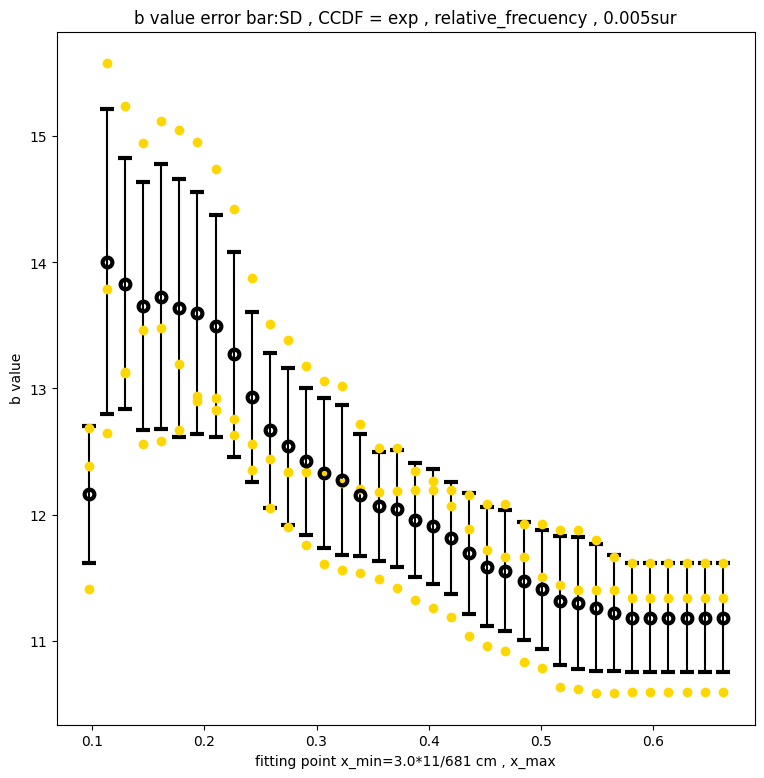

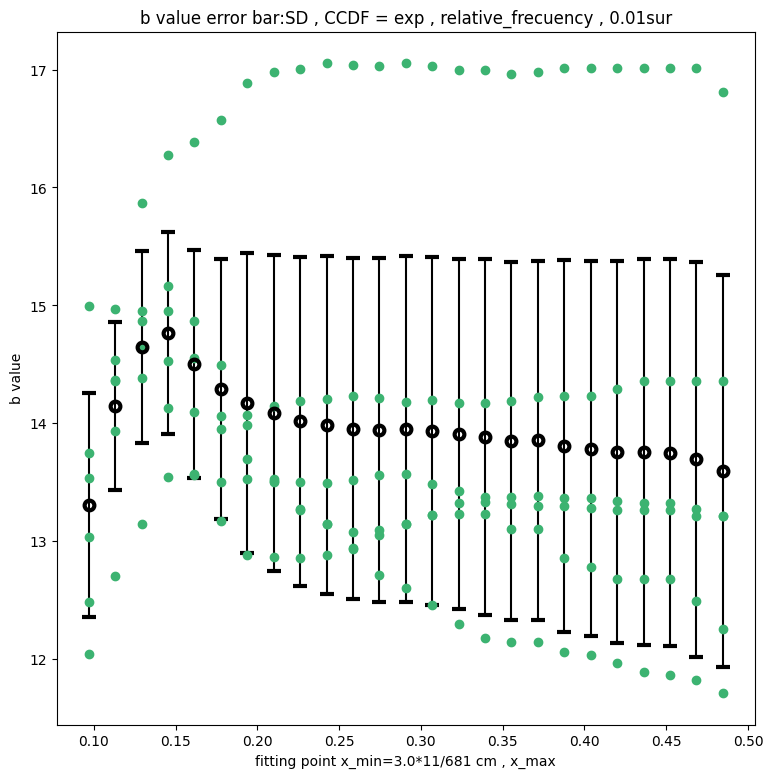

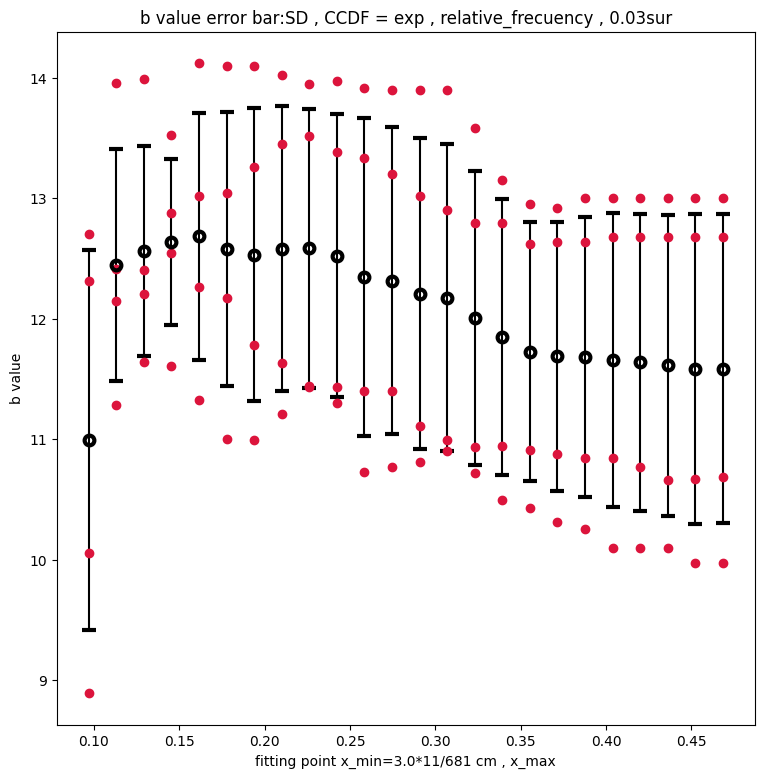

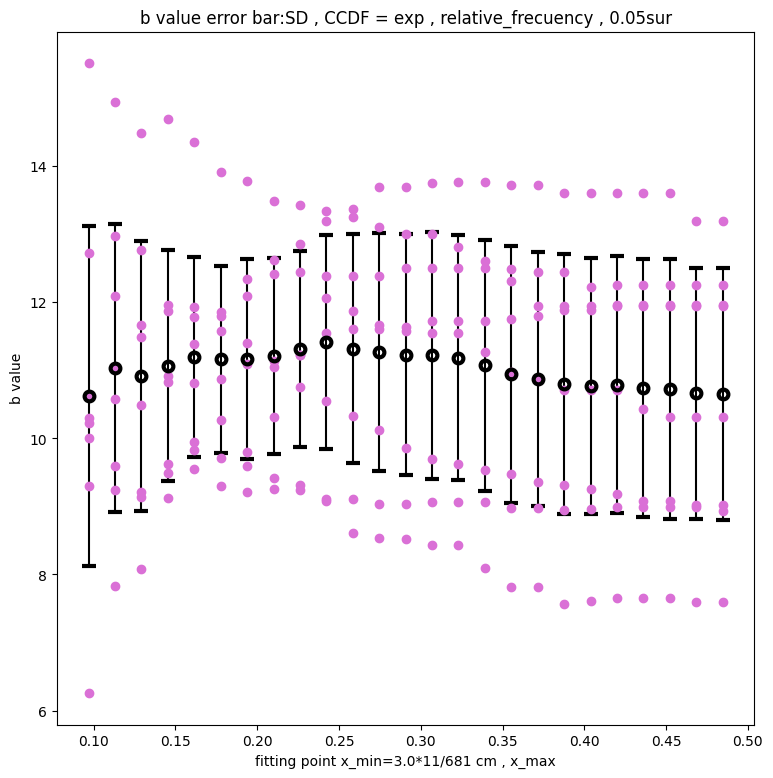

In [51]:
def CCDF_exp(x,a,b): #Complementary Cumulative Distribution Function(相補累積分布関数)
    return b/a*np.exp(-b*x)

def CCDF_exp_log(x,a,b):
    with np.errstate(invalid='ignore'):
        return np.log(b/a)-b*x

def CCDF_pow(x,a,b):
    return a/(b-1)*x**(-b+1)

def CCDF_pow_log(x,a,b): #x->logxを入れる
    return np.log(a/(b-1))+(-b+1)*x


#read data
unit=11/681 #cm/pix

if os.path.exists("/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"):
    data_dir_path="/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"
elif os.path.exists("/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"):
    data_dir_path="/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"

data_list=glob.glob(data_dir_path + "*")
data_kind_list=[os.path.basename(x) for x in data_list if not "img" in x]
print(data_kind_list)
order=[2,1,0,3]
tmp=copy.deepcopy(data_kind_list)
for i ,order in enumerate(order):
    tmp[i]=data_kind_list[order]
data_kind_list=tmp
print(data_kind_list)

tmp=glob.glob(data_dir_path+data_kind_list[0]+"/*.dat")
name_list=[os.path.basename(x) for x in tmp]
sur_con_list=[x[9:-16] for x in name_list]
sur_con_list=list(set(sur_con_list))
print(sur_con_list)
order=[4,2,0,3,1]
tmp=copy.deepcopy(sur_con_list)
for i ,order in enumerate(order):
    tmp[i]=sur_con_list[order]
sur_con_list=tmp
print(sur_con_list)
colors=["royalblue","gold","mediumseagreen","crimson","orchid"]

cutoff=1
a_list=[[] for i in range(len(sur_con_list))]
b_list=[[] for i in range(len(sur_con_list))]

for kind in data_kind_list :
    if 'Vector_length' in kind:
        print(kind)

        for target_i , target in enumerate(sur_con_list):
            # 特定の文字列を持つファイル名を抽出(濃度ごと)
            target_files = [name for name in name_list if target in name]
            N_tg=len(target_files)
            row=int((N_tg-1)/4)+1
            col=4
            pic_count=0
            Max=0
            Max_data_list=[]
            fig , ax = plt.subplots(figsize=(9,9))
            ax.set_xlabel("fitting point x_min=3.0*11/681 cm , x_max")
            ax.set_ylabel("b value")
            ax.set_title("b value error bar:SD , CCDF = exp , relative_frecuency , "+str(target))

            #x_min,x_maxを動かす範囲の探索
            for file in target_files:
                path=data_dir_path+kind+"/"+file
                data=pd.read_csv(path)
                data=data[data>=cutoff]
                data=data.dropna()
                data=data.iloc[:,0]*unit
                pic_row=int((pic_count)/4)
                pic_col=(pic_count)%4
                N_data=len(data)
                Max_data_list.append(max(data))

            x_min_width=1*unit
            x_max_width=1*unit
            x_min=[x_min_width*i for i in range(1,int(min(Max_data_list)/x_min_width)-6)]
            x_max=[x_max_width*i for i in range(6,int(min(Max_data_list)/x_min_width))]
            
            #a,bのx_min,x_maxによる変化
            # for x_min_i,x_min in enumerate(x_min):
            for x_max_i,x_max in enumerate(x_max):
                a_list=[]
                b_list=[]
                for file in target_files:
                    path=data_dir_path+kind+"/"+file
                    data=pd.read_csv(path)
                    data=data[data>=cutoff]
                    data=data.dropna()
                    data=data.iloc[:,0]*unit
                    pic_row=int((pic_count)/4)
                    pic_col=(pic_count)%4
                    N_data=len(data)
                    
                    #相補累積分布関数
                    sx=sorted(data)
                    sy=[1-i/N_data for i in range(N_data)]

                    # 近似曲線計算
                    # #DCF=pow
                    # x=[sx for sx in sx if sx<=x_max]
                    # y=[sy[i] for i in range(0,len(x))]
                    # x=[x for x in x if x>=5]
                    # y=[y[i] for i in range(len(y)-len(x),len(y))]
                    # x_log=np.log(x)
                    # y_log=np.log(y)
                    # p0=[1.0,2.0]
                    # params_pow, _ = curve_fit(CCDF_pow_log,x_log,y_log,p0=p0)
                    # a_list.append(params_pow[0])
                    # b_list.append(params_pow[1])
                    # ax.set_xlim(0,37)
                    # ax.set_ylim(0,7)

                    # DCF=exp
                    x=[sx for sx in sx if sx<=x_max]
                    y=[sy[i] for i in range(0,len(x))]
                    x=[x for x in x if x>=5*unit]
                    y=[y[i] for i in range(len(y)-len(x),len(y))]
                    y_log=np.log(y)
                    params_defo=[1.0,2.0]
                    params_pow, _ = curve_fit(CCDF_exp_log,x,y_log,p0=params_defo)
                    a_list.append(params_pow[0])
                    b_list.append(params_pow[1])
                    # ax.set_xlim(0,37)
                    # ax.set_ylim(0,0.28)

                x_b=np.full(len(b_list),x_max)
                y_b=np.array(b_list)
                y_b_ave=np.average(y_b)
                y_b_err_sd=y_b.std()
                
                ax.errorbar(x_b[0],y_b_ave,yerr=y_b_err_sd,capsize=5, fmt='o', ecolor="k", ms=7, mfc='None', mec='k',mew=3)
                ax.plot(x_b,y_b,"o",ls="",c=colors[target_i])
                    # ax.set_xlabel("Consentration")
                    # ax.set_ylabel("b value")
                    
                    # axes[0,2].set_title("Complementary Cumulative Distribution Function")
                    # axes[0,0].set_title(kind)
                    # axes[0,1].set_title("Concentration : " + target)
                    # axes[0,3].set_title(r"branch length without $r<$"+str(cutoff)+" (pix)")

                    # os.makedirs(data_dir_path+"/each_result_img/",exist_ok=True)
                    # plt.savefig(data_dir_path+"/each_result_img/" + str(kind) + "_" + str(target) +".pdf")
                    # plt.savefig(data_dir_path+"/each_result_img/" + str(kind) + "_" + str(target) + ".png")
                    # pic_count+=1
        plt.show()

# fig,ax=plt.subplots(1,1,figsize=(9,9)) 
# ax.set_title=("b value error bar:SD")
# for sur_i , surfactant in enumerate(sur_con_list):
#     x_b=np.full(len(b_list[sur_i]),sur_con_list[sur_i])
#     y_b=np.array(b_list[sur_i])
#     y_b_ave=np.average(y_b)
#     y_b_err_sd=y_b.std()
    
#     ax.errorbar(x_b[0],y_b_ave,yerr=y_b_err_sd,capsize=5, fmt='o', ecolor='k', ms=7, mfc='None', mec='k',mew=3)
#     ax.plot(x_b,y_b,"o",ls="",c=colors[sur_i])
#     ax.set_xlabel("Consentration")
#     ax.set_ylabel("b value")

# name='Vector_length'
# fig.suptitle("b value of " + name + " error bar:SD")
# # os.makedirs(data_dir_path+"/each_result_img/",exist_ok=True)
# # plt.savefig(data_dir_path+"/each_result_img/fit_value_" + name +".pdf")
# # plt.savefig(data_dir_path+"/each_result_img/fit_value_" + name + ".png")
# plt.show()

['Edited_vector_length', 'Vector_angle', 'Vector_length', 'Vector_outer_angle']
['Vector_length', 'Vector_angle', 'Edited_vector_length', 'Vector_outer_angle']
['0.01sur', '0.05sur', '0.005sur', 'nonsur', '0.03sur']
['nonsur', '0.005sur', '0.01sur', '0.03sur', '0.05sur']
Vector_length


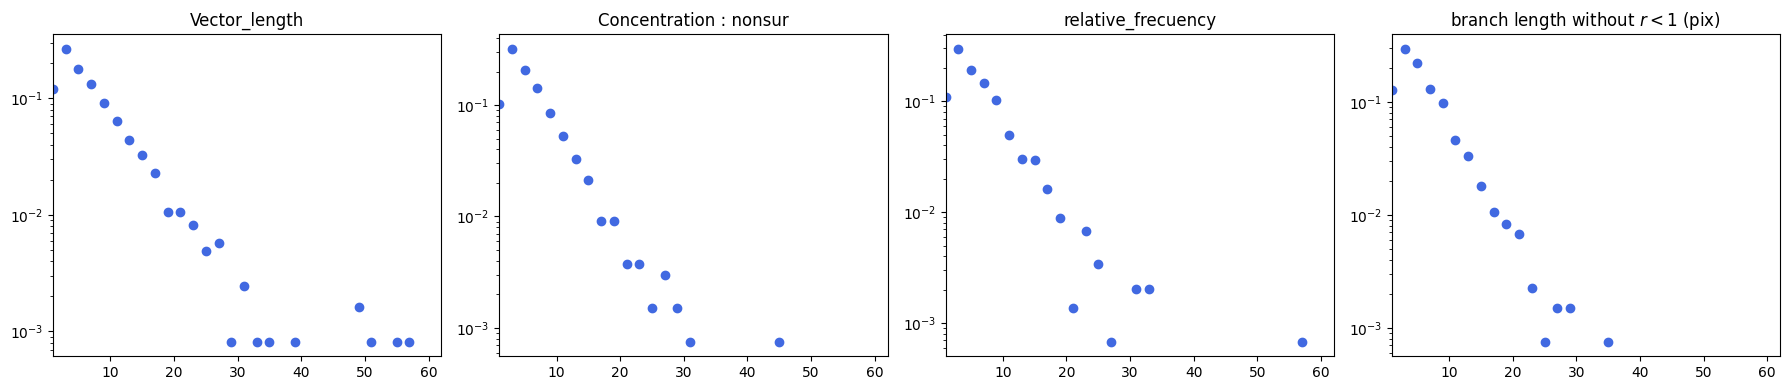

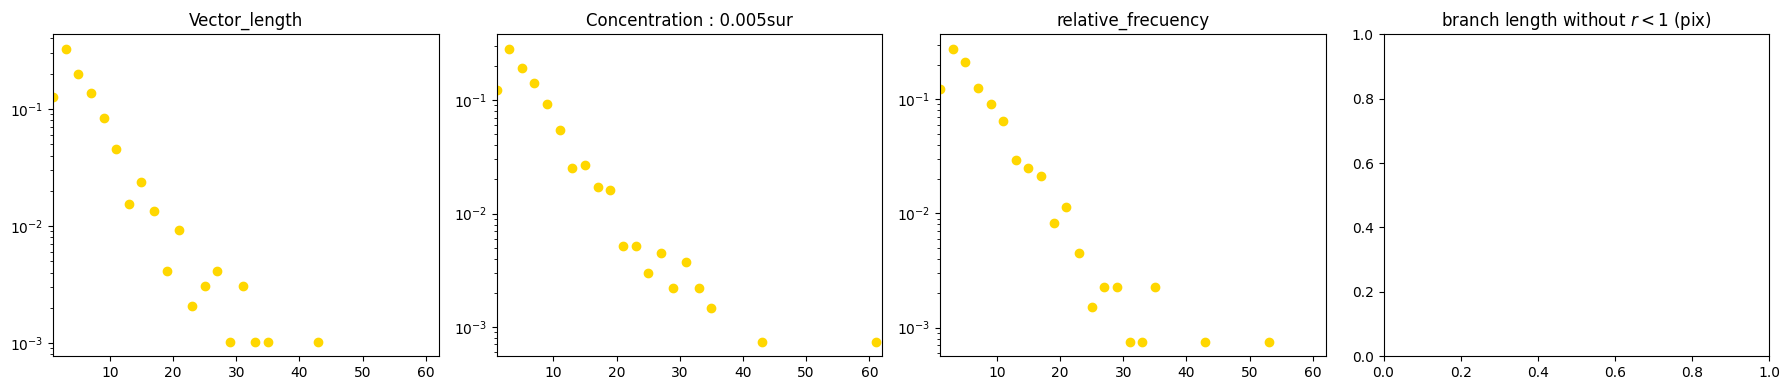

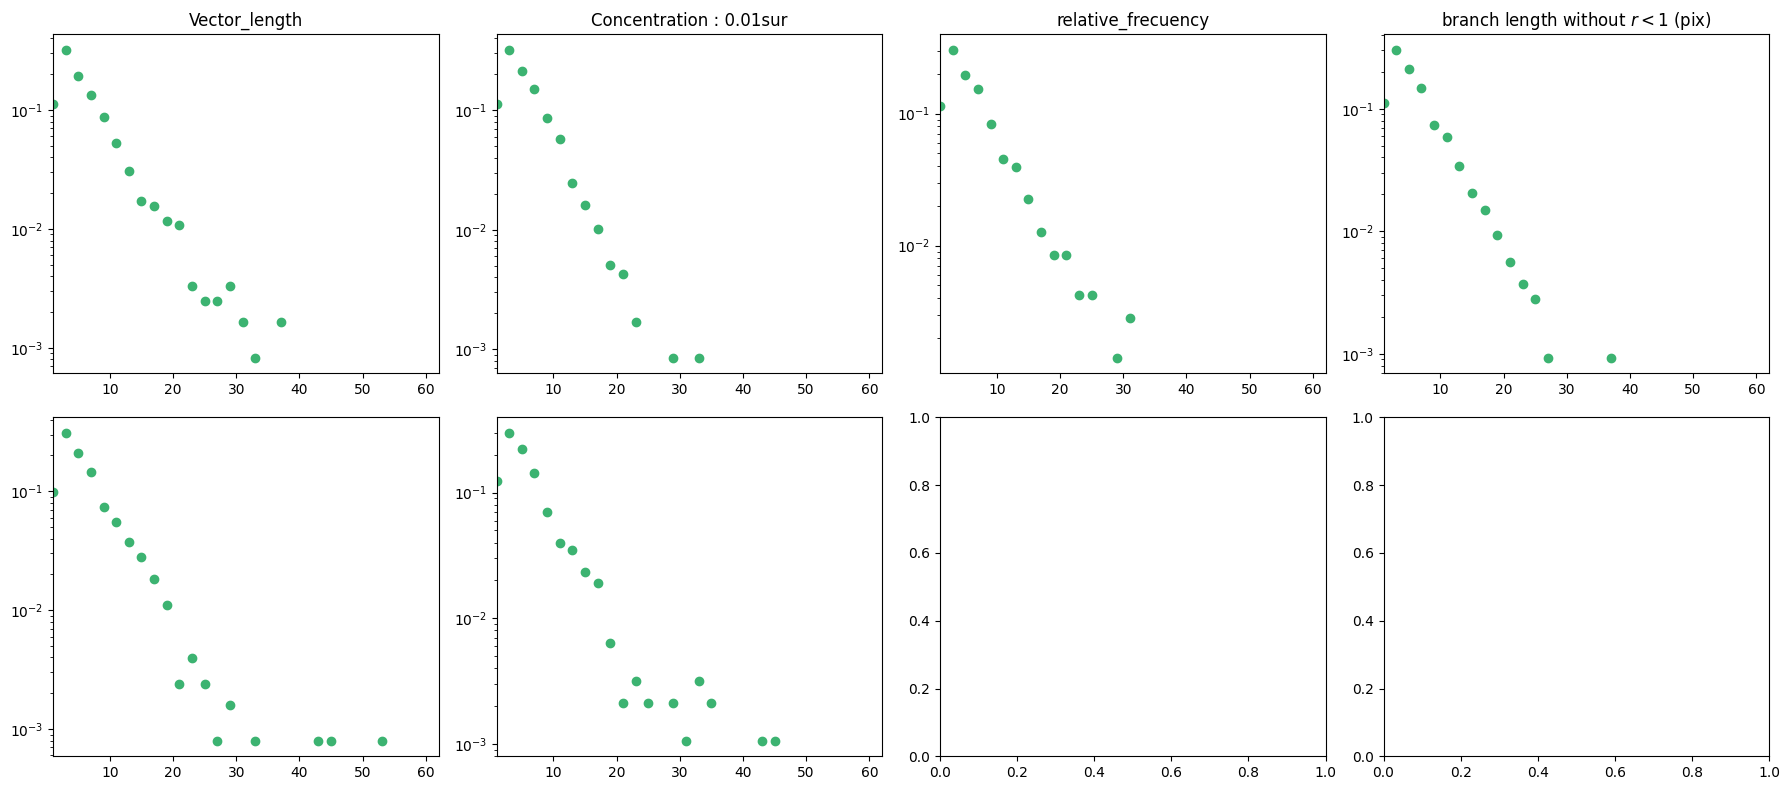

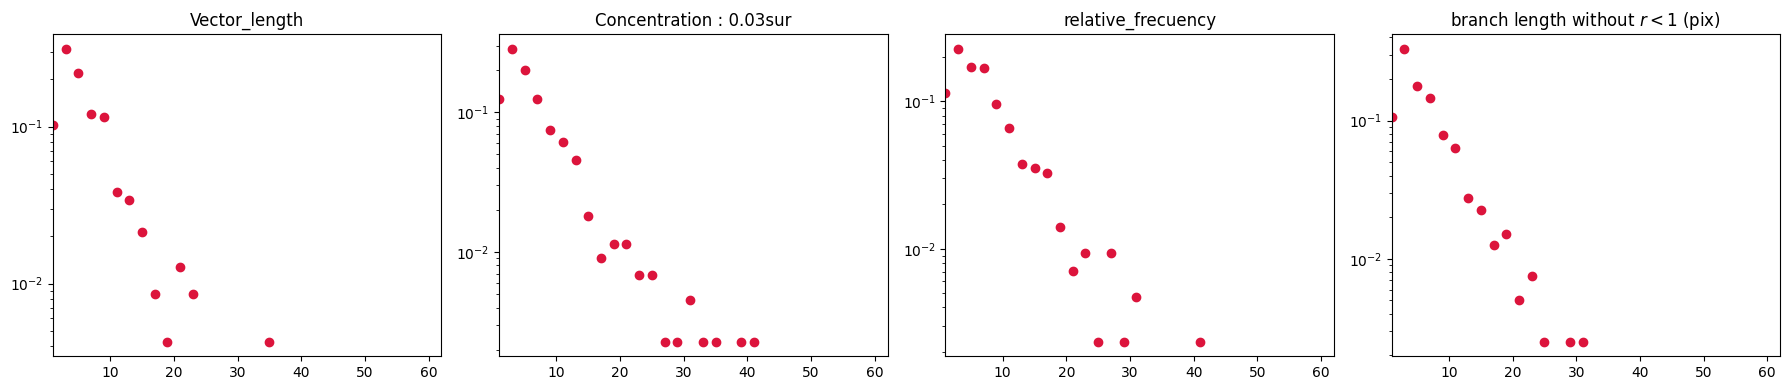

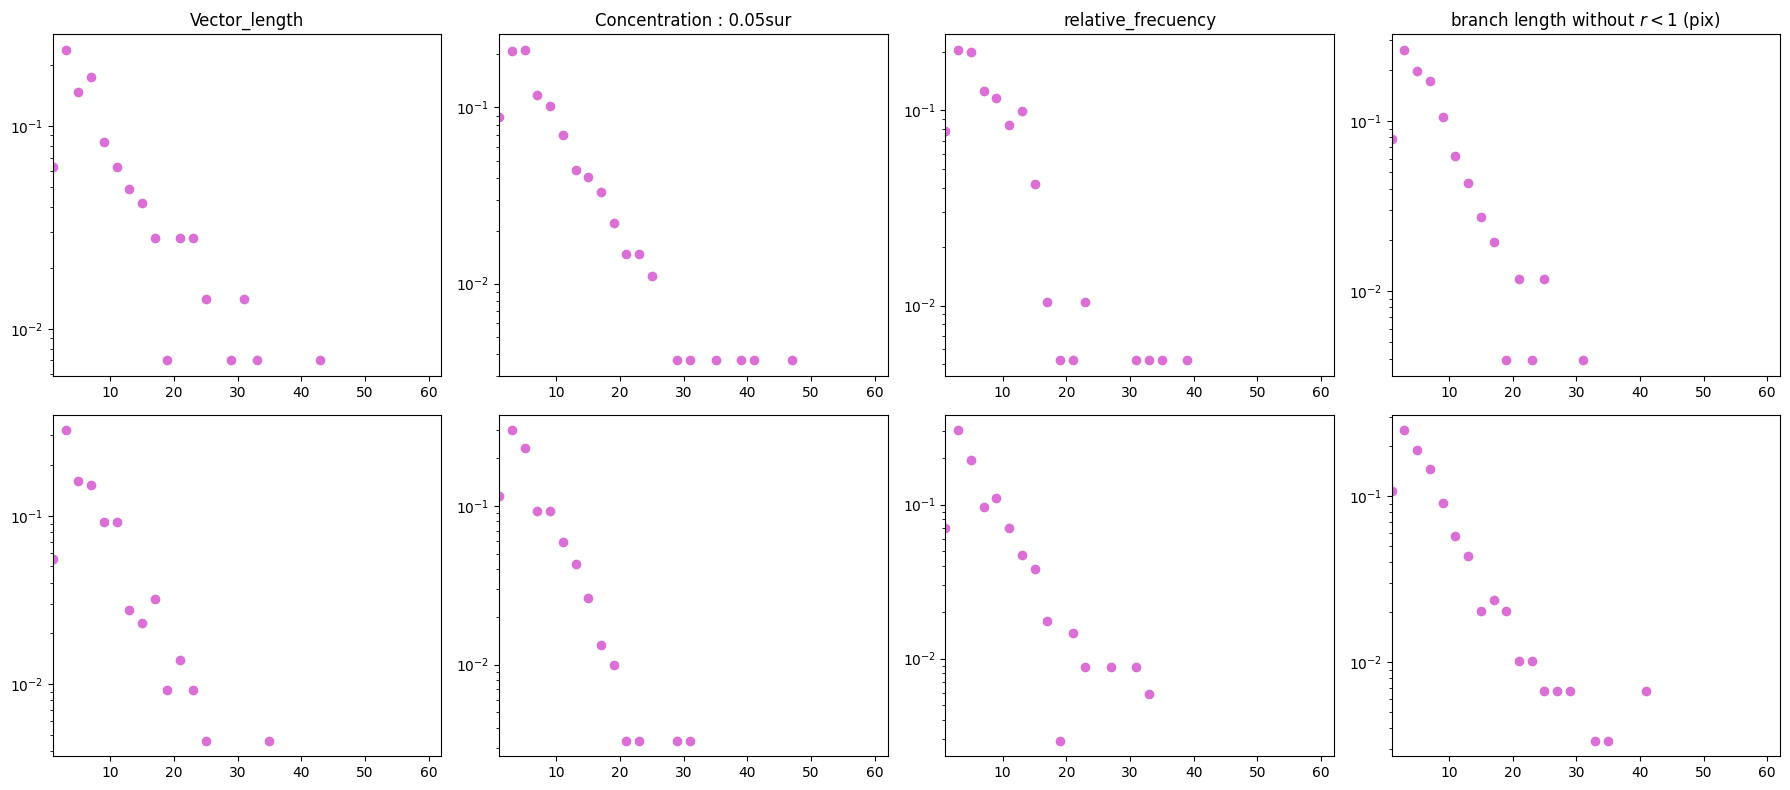

[[], [], [], [], []]
[[], [], [], [], []]


In [8]:
def func_pow(x,a,b):
    return a*x**(-b) #Under Flow Warning が出る

def func_exp(x,a,b):
    return a*np.exp(-b*x)

def func_log10(x,a,b): #func_powの対数変換
    return -b*np.log10(x)+np.log10(a)

def norm(x,a,b):
    return np.exp(-(x-a)**2/(2*b**2))/(b*np.sqrt(2*np.pi))

#Sorting data
unit=11/681
#WindowsOS or Mac OS
if os.path.exists("/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"):
    data_dir_path="/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"
elif os.path.exists("/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"):
    data_dir_path="/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"

data_list=glob.glob(data_dir_path + "*")
data_kind_list=[os.path.basename(x) for x in data_list if not "img" in x]
print(data_kind_list)
order=[2,1,0,3]
tmp=copy.deepcopy(data_kind_list)
for i ,order in enumerate(order):
    tmp[i]=data_kind_list[order]
data_kind_list=tmp
print(data_kind_list)

tmp=glob.glob(data_dir_path+data_kind_list[0]+"/*.dat")
name_list=[os.path.basename(x) for x in tmp]
sur_con_list=[x[9:-16] for x in name_list]
sur_con_list=list(set(sur_con_list))
print(sur_con_list)
order=[3,2,0,4,1]
tmp=copy.deepcopy(sur_con_list)
for i ,order in enumerate(order):
    tmp[i]=sur_con_list[order]
sur_con_list=tmp
print(sur_con_list)
colors=["royalblue","gold","mediumseagreen","crimson","orchid"]

cutoff=1
a_list=[[] for i in range(len(sur_con_list))]
b_list=[[] for i in range(len(sur_con_list))]

for kind in data_kind_list :
    if 'Vector_length' in kind:
        print(kind)
        Max=0
        for target_i , target in enumerate(sur_con_list):
            # 特定の文字列を持つファイル名を抽出(濃度ごと)
            target_files = [name for name in name_list if target in name]
            #最大値の探索
            for file in target_files:
                path=data_dir_path+kind+"/"+file
                data=pd.read_csv(path)
                data=data[data>cutoff]
                data=data.dropna()
                data=data.iloc[:,0]
                if Max<max(data):
                    Max=max(data)

        for target_i , target in enumerate(sur_con_list):
            # 特定の文字列を持つファイル名を抽出(濃度ごと)
            target_files = [name for name in name_list if target in name]
            N=len(target_files)
            row=int((N-1)/4)+1
            col=4
            pic_count=0
            
            fig , axes = plt.subplots(row,col,squeeze=False,tight_layout=True,figsize=(4*col+2,4*row))

            #グラフの描画
            for file in target_files:
                path=data_dir_path+kind+"/"+file
                data=pd.read_csv(path)
                data=data[data>=cutoff]
                data=data.dropna()
                data=data.iloc[:,0]
                width=2
                range_set=int(Max-Max%width+width)
                bin_num=int(range_set/width)
                bin_log=np.logspace(0, np.log10(range_set), 13)
                pic_row=int((pic_count)/4)
                pic_col=(pic_count)%4

                # 度数表示
                #重み付き相対度数
                weighted_relative_frecuency=list(data/sum(data))
                #相対度数
                relative_frecuency=list(np.ones_like(data)/len(data))
                n , bins,=np.histogram(data,bins=bin_num,weights=relative_frecuency,range=(0,range_set))
                tmp = bins[:-1] + np.diff(bins)/2
                zero_count=0
                # for val in reversed(n):
                #     if val!=0:
                #         break
                #     zero_count+=1
                # if zero_count!=0:
                #     n=n[:-int(zero_count)]
                #     tmp=tmp[:-int(zero_count)]
                # if 0 in n:
                #     print("not_better_of_bins")
                #     print(n)
                #     sys.exit()
                x=tmp
                y=n
                axes[pic_row,pic_col].plot(x, y,color=colors[target_i],label=target,marker="o",ls="")
                axes[pic_row,pic_col].set_xlim(1,range_set)
                # axes[pic_row,pic_col].set_xscale("log")
                axes[pic_row,pic_col].set_yscale("log")
                # # 近似曲線計算
                # tmp = bins[:-1] + (bins[1] - bins[0])/2
                # x=tmp[n!=0]
                # y=np.log10(n[n!=0])
                # # params_pow, covariance_pow = curve_fit(func_pow,x,y)
                # params_log10, covariance_log10 = curve_fit(func_log10,x,y)
                # x_fit = np.linspace(min(x),max(x),100)
                # y_fit = func_pow(x_fit, *params_log10)
                # axes[pic_row,pic_col].plot(x_fit, y_fit,color=colors[target_i],label=target+r" a:" +f"{params_log10[0]:.2f}, "+r"b:"+f"{params_log10[1]:.2f}")
                # a_list[target_i].append(params_log10[0])
                # b_list[target_i].append(params_log10[1])
                axes[0,2].set_title("relative_frecuency")
                axes[0,0].set_title(kind)
                axes[0,1].set_title("Concentration : " + target)
                axes[0,3].set_title(r"branch length without $r<$"+str(cutoff)+" (pix)")

                # axes[pic_row,pic_col].legend(loc="upper right", fontsize=10,borderaxespad=0,title=r"$y=ax^{-b}$")
                # os.makedirs(data_dir_path+"/each_result_img/",exist_ok=True)
                # plt.savefig(data_dir_path+"/each_result_img/" + str(kind) + "_" + str(target) +".pdf")
                # plt.savefig(data_dir_path+"/each_result_img/" + str(kind) + "_" + str(target) + ".png")
                pic_count+=1
plt.show()
print(a_list)
print(b_list)

# fig,ax=plt.subplots(1,2,figsize=(18,9))
# ax[0].set_title=("a value error bar:SD")
# ax[1].set_title=("b value error bar:SD")
# for sur_i , surfactant in enumerate(sur_con_list):
#     x_a=np.full(len(a_list[sur_i]),sur_con_list[sur_i])
#     x_b=np.full(len(b_list[sur_i]),sur_con_list[sur_i])
#     y_a=np.array(a_list[sur_i])
#     y_b=np.array(b_list[sur_i])
#     y_a_ave=np.average(y_a)
#     y_b_ave=np.average(y_b)
#     y_a_err_sd=y_a.std()
#     y_b_err_sd=y_b.std()
    
#     ax[0].errorbar(x_a[0],y_a_ave,yerr=y_a_err_sd,capsize=5, fmt='o', ecolor='k', ms=7, mfc='None', mec='k',mew=3)
#     ax[0].plot(x_a,y_a,"o",ls="",c=colors[sur_i])
#     ax[0].set_xlabel("Consentration")
#     ax[0].set_ylabel("a value")
    
#     ax[1].errorbar(x_b[0],y_b_ave,yerr=y_b_err_sd,capsize=5, fmt='o', ecolor='k', ms=7, mfc='None', mec='k',mew=3)
#     ax[1].plot(x_b,y_b,"o",ls="",c=colors[sur_i])
#     ax[1].set_xlabel("Consentration")
#     ax[1].set_ylabel("b value")

# name='Vector_length'
# fig.suptitle("a,b value of " + name + " error bar:SD")
# os.makedirs(data_dir_path+"/each_result_img/",exist_ok=True)
# plt.savefig(data_dir_path+"/each_result_img/fit_value_" + name +".pdf")
# plt.savefig(data_dir_path+"/each_result_img/fit_value_" + name + ".png")
# plt.show()

In [70]:
# # Making subplots name
# col=2
# row=2
# count=1
# ax_str="("
# for i in range(row):
#     ax_str+="("
#     for j in range(col):
#         ax_str+="ax"+str(count)
#         if j != col-1:
#             ax_str+=","
#         count+=1
#     ax_str+=")"
#     if i != row-1:
#         ax_str+=","
# ax_str+=")"
# print(ax_str)
a=[1,2,3,4,5,6,7,8,9,10]
print(sum(a))
print(sum(a[0:5]))

55
15


['Edited_vector_length', 'Vector_angle', 'Vector_length', 'Vector_outer_angle']
['Vector_length', 'Vector_angle', 'Edited_vector_length', 'Vector_outer_angle']
['0.05sur', 'nonsur', '0.005sur', '0.03sur', '0.01sur']
['0.05sur', '0.03sur', '0.01sur', '0.005sur', 'nonsur']
Vector_length
Vector_angle


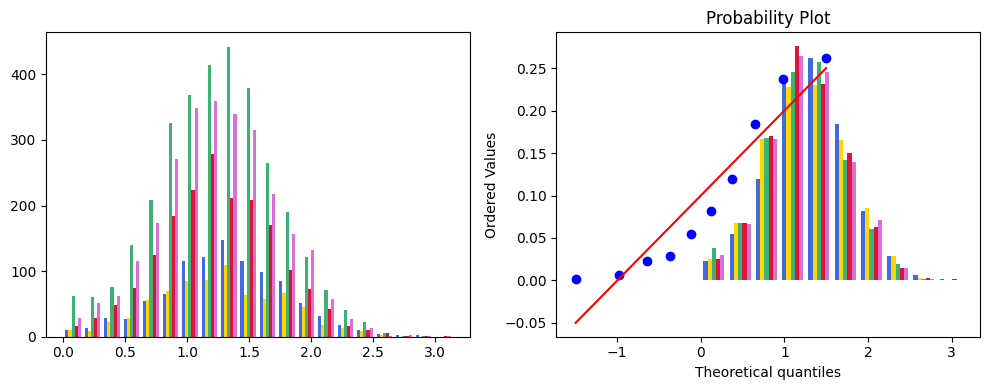

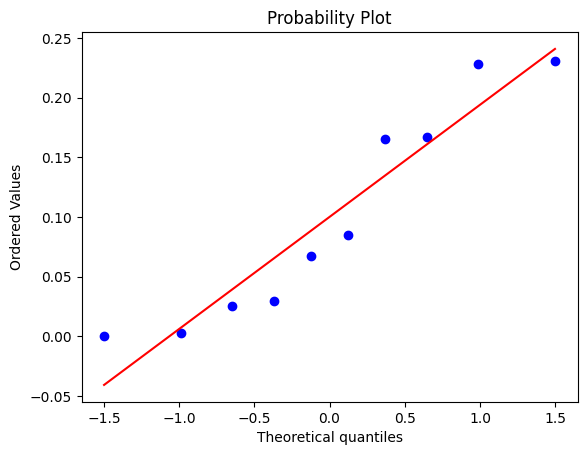

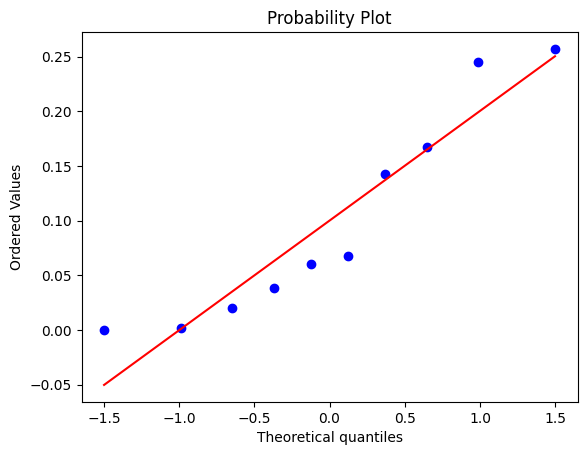

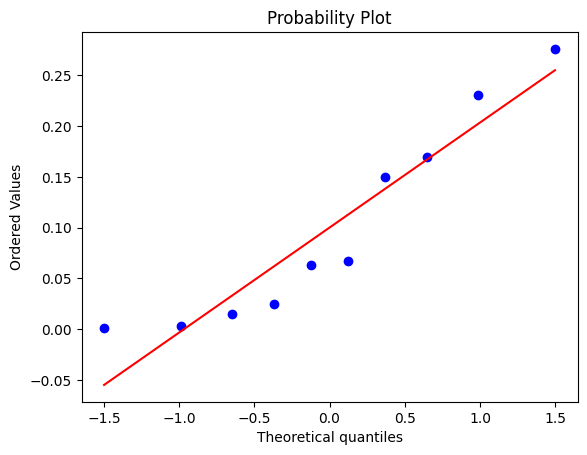

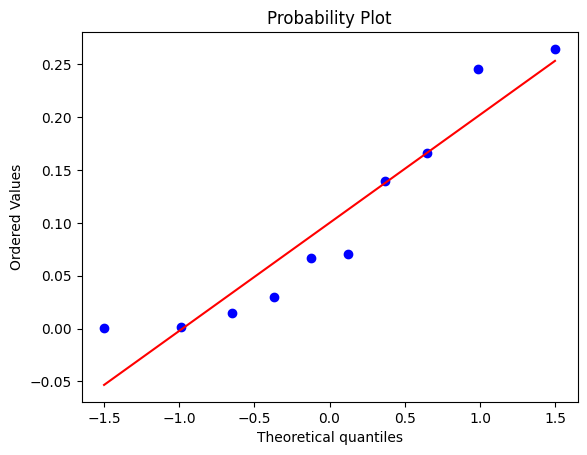

Edited_vector_length
Vector_outer_angle


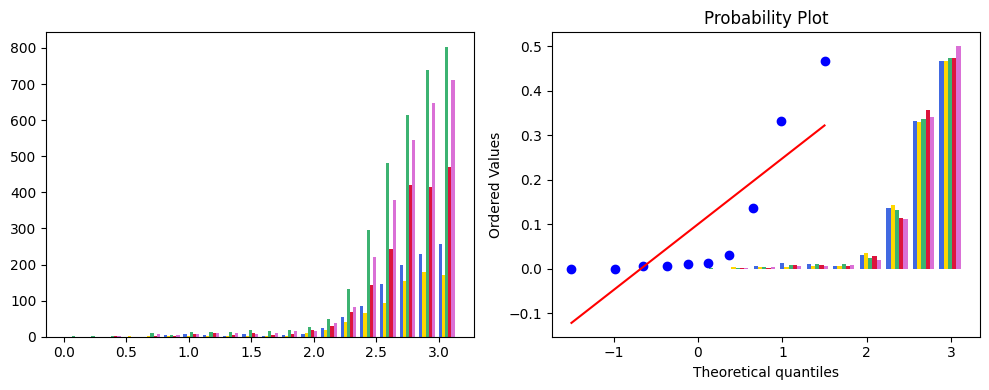

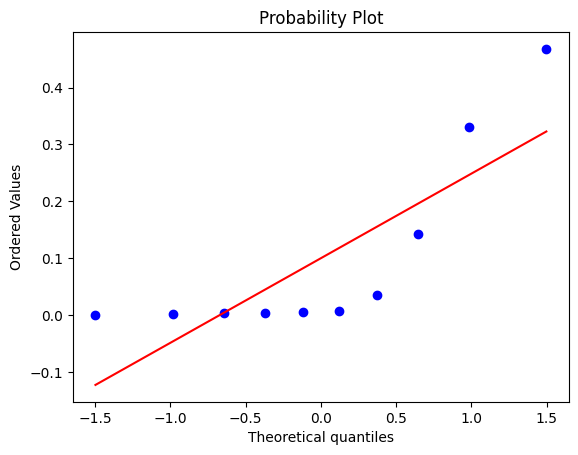

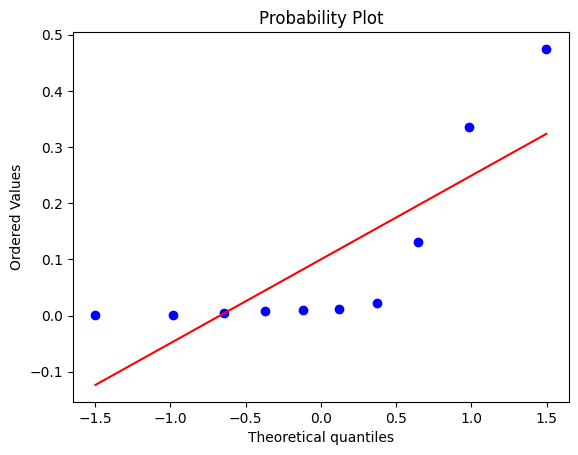

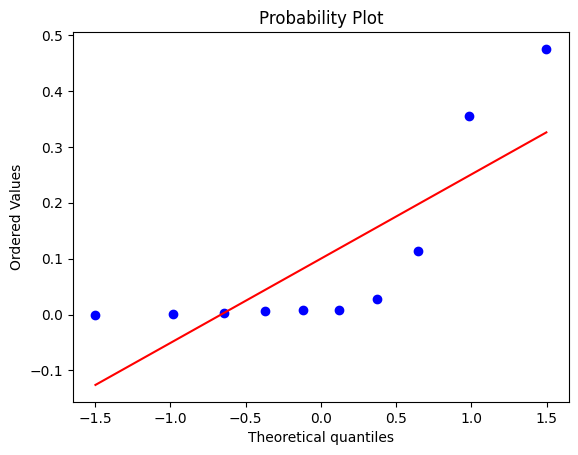

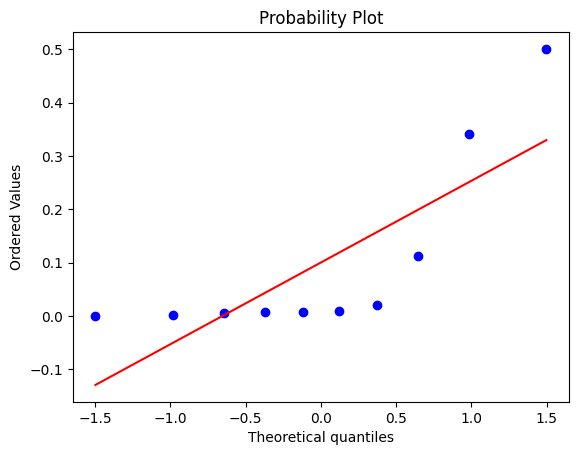

In [ ]:
def func_pow(x,a,b):
    return a*x**(-b) #Under Flow Warning が出る

def func_exp(x,a,b):
    return a*np.exp(-b*x)

def func_log10(x,a,b): #func_powの対数変換
    return -b*np.log10(x)+np.log10(a)

def norm(x,a,b):
    return np.exp(-(x-a)**2/(2*b**2))/(b*np.sqrt(2*np.pi))
#Sorting data
unit=11/681

if os.path.exists("/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"):
    data_dir_path="/mnt/c/Users/PC/Desktop/Master_Thesis/movie_analisis/movie_analisis_data/"
elif os.path.exists("/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"):
    data_dir_path="/Users/tomoyanakamura/Documents/dendrite/movie_analisis/movie_analisis_data/"

data_list=glob.glob(str(data_dir_path) + "*")
data_kind_list=[os.path.basename(x) for x in data_list if not "img" in x]
print(data_kind_list)
order=[2,1,0,3]
tmp=copy.deepcopy(data_kind_list)
for i ,order in enumerate(order):
    tmp[i]=data_kind_list[order]
data_kind_list=tmp
print(data_kind_list)

tmp=glob.glob(str(data_dir_path) + str(data_kind_list[0]) + "/*.dat")
name_list=[os.path.basename(x) for x in tmp]
sur_con_list=[x[9:-16] for x in name_list]
sur_con_list=list(set(sur_con_list))
print(sur_con_list)
order=[0,3,4,2,1]
tmp=copy.deepcopy(sur_con_list)
for i ,order in enumerate(order):
    tmp[i]=sur_con_list[order]
sur_con_list=tmp
print(sur_con_list)
colors=["royalblue","gold","mediumseagreen","crimson","orchid"]
row=1
col=3
cutoff=1

for kind in data_kind_list:
    print(kind)
    Max=0
    total_data=[]
    label_data=[]
    relative_frecuency=[]
    weighted_relative_frecuency=[]
    mu=[]
    sigma=[]
    for target in sur_con_list:
        # 特定の文字列を持つファイル名を抽出
        target_files = [name for name in name_list if target in name]
        df=pd.DataFrame()
        N=len(target_files)
        for file in target_files:
            path=str(data_dir_path) + kind + "/" + file
            df_tmp=pd.read_csv(path)
            df=pd.concat([df,df_tmp],axis=0)
        data=df.iloc[:,0]
        
        if Max<max(data):
            Max=max(data)
            
        if "length" in kind:
            data=data[data>=cutoff]
            
        label=target+" , N="+str(N)
        total_data.append(list(data))
        relative_frecuency.append(list(np.ones_like(data)/len(data)))
        weighted_relative_frecuency.append(list(data/sum(data)))
        # print(max(data),sum(data),max(data)/sum(data))
        label_data.append(label)
        mu.append(pd.Series(data).mean())
        sigma.append(pd.Series(data).std())

    if "angle" in kind:
        fig , axes = plt.subplots(row,col-1,squeeze=False,tight_layout=True,figsize=(4*(col-1)+2,4))
        n_test,_,_=axes[0,0].hist(total_data,bins=20,range=(0,math.pi),label=label_data,rwidth=0.8,color=colors)
        # #相対度数
        n , bins , patches = plt.hist(total_data,bins=10,weights=relative_frecuency,range=(0,math.pi),label=label_data,rwidth=0.8,color=colors)
        for i in range(len(total_data)):
            data=np.array(n[i])
            st.probplot(data, dist="norm", plot=plt)
            plt.show()
            


In [4]:
filename = "/mnt/c/Users/PC/Desktop/testdata.csv"
df=pd.read_csv(filename)
print(df)
a=df.values
# print(a)
time=[423.74,1791.79,1162.68,704.13,1799.89]

x=[]

for i in range(len(a[0])):
    x.append(a[~np.isnan(a[:,i]),i])
tot=0
tot_up=0
tot_low=0

for i in range(len(a[0])):
    print(len(x[i]),time[i]/len(x[i]),(time[i]+60)/len(x[i]),(time[i]-60)/len(x[i]))
    
for i in range(2,len(a[0])):
    tot+=time[i]/len(x[i])
    tot_up+=(time[i]+60)/len(x[i])
    tot_low+=(time[i]-60)/len(x[i])
dt=tot/3
dt_up=tot_up/3
dt_low=tot_low/3
print(dt,dt_up,dt_low)

for i in range(len(a[0])):
    xtmp=[x[i][j]for j in range(len(x[i])) if x[i][j]>1e-6]
    # print(xtmp)
    x[i]=xtmp
    
fig,ax=plt.subplots(1,3,figsize=(20,9))
ax[0].set_xlabel(r"time   $t$")
ax[0].set_ylabel(r"DC   $I$ A")
ax[1].set_xlabel(r"time   $t$")
ax[2].set_xlabel(r"time   $t$")
ax[2].set_ylabel(r"$I$ velocity $\frac{d I(t)}{d t}$")

for i in range(len(a[0])):
    time=[j*dt for j in range(len(x[i]))]
    I_v=[(x[i][j+1]-x[i][j-1])/(2*dt) for j in range(1,len(x[i])-1)]
    I_v_time=[j*dt for j in range(1,len(x[i])-1)]
    if i <3:
        ax[0].plot(time,x[i],label="1.0 mm",c="blue")
        ax[1].plot(time,x[i],label="1.0 mm",c="blue")
        ax[2].plot(I_v_time,I_v,label="1.0 mm",c="blue")
    
    else:
        ax[0].plot(time,x[i],label="0.5 mm",c="red")
        ax[1].plot(time,x[i],label="0.5 mm",c="red")
        ax[2].plot(I_v_time,I_v,label="0.5 mm",c="red")
    
    ax[0].set_ylim(0,1.5e-1)
    
    ax[1].set_ylim(0,8.0e-2)
    ax[1].set_xlim(0,100)
    
    ax[2].set_ylim(-2.5e-3,2.5e-3)
    ax[2].set_xlim(0,100)
    
plt.legend(loc="upper left")
plt.show()
    

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/PC/Desktop/testdata.csv'

/tmp/ipykernel_825/151950107.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0].plot(x,y,"-o",ls="",c=Color[i])
/tmp/ipykernel_825/151950107.py:24: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[1].plot(x,y,"-o",ls="",c=Color[i])


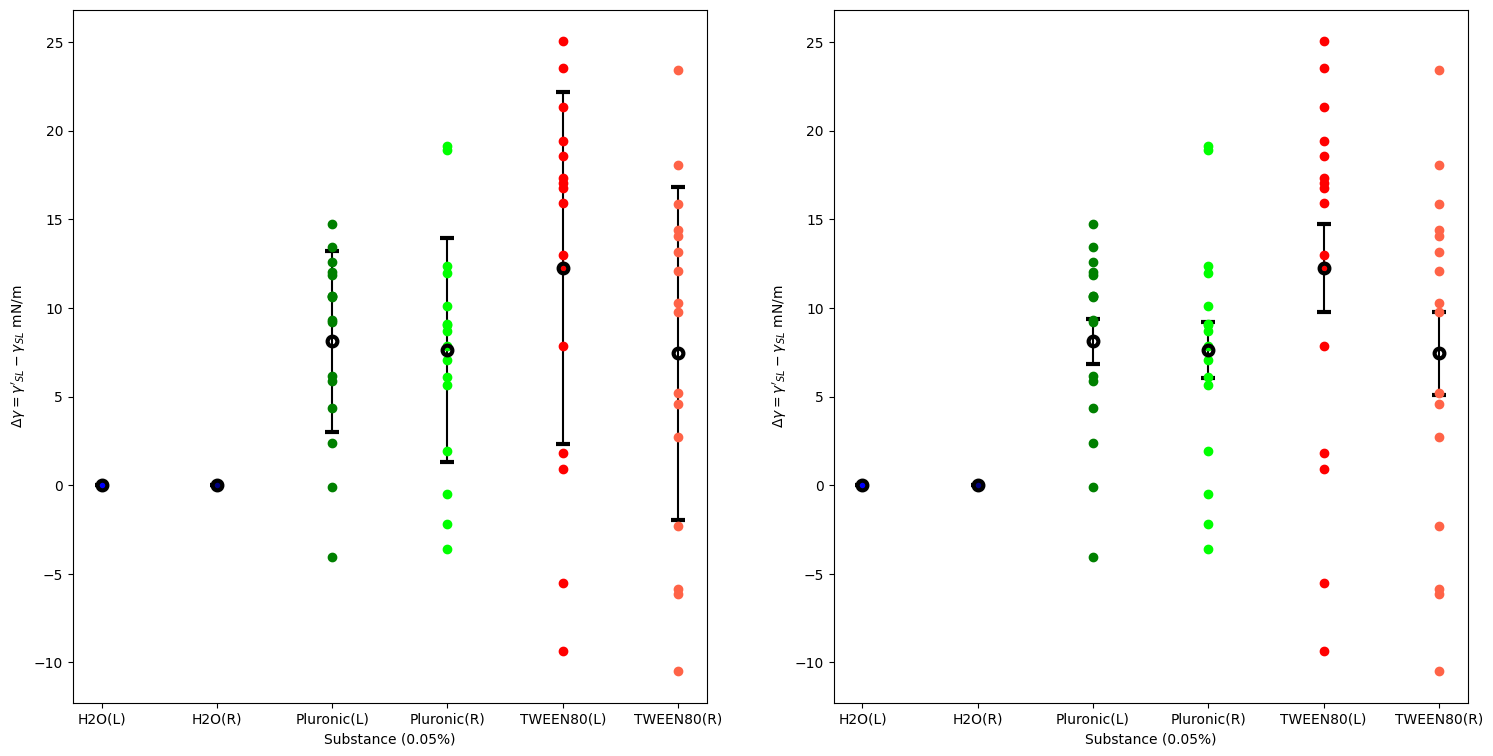

In [100]:
filename="/mnt/d/master_thesis_data/experment_data/movie_analisis_data/data_for_contact_angle/Contact_angle.csv"

df=pd.read_csv(filename,index_col=0,skiprows=[i*7 for i in range(1,4)],usecols=range(5,10))
a=df.values
substance=["H2O(L)","H2O(R)","Pluronic(L)","Pluronic(R)","TWEEN80(L)","TWEEN80(R)"]
Color=["blue","navy","green","lime","red","tomato"]
fig,ax=plt.subplots(1,2,figsize=(18,9))
ax[0].set_title=("error bar:SD")
ax[1].set_title=("error bar:SE")
for i in range(len(substance)):
    y=[]
    for j in range(4):
        y.append(a[j*6+i])
    x=np.full(len(a[i])*4,substance[i])
    y=np.reshape(y,[16])
    y_ave=np.average(y)
    y_err_sd=np.array(y.std())
    y_err_se=np.array(y.std())/np.sqrt(len(y))
    
    ax[0].errorbar(x[0],y_ave,yerr=y_err_sd,capsize=5, fmt='o', ecolor='k', ms=7, mfc='None', mec='k',mew=3)
    ax[0].plot(x,y,"-o",ls="",c=Color[i])
    
    ax[1].errorbar(x[0],y_ave,yerr=y_err_se,capsize=5, fmt='o', ecolor='k', ms=7, mfc='None', mec='k',mew=3)
    ax[1].plot(x,y,"-o",ls="",c=Color[i])

for i in range(2):  
    ax[i].set_xlabel("Substance (0.05%)")
    ax[i].set_ylabel(r"$\Delta \gamma=\gamma'_{SL}-\gamma_{SL} \ \mathrm{mN/m}$")

plt.show()

0.41747123872344555
0.4186625544267053


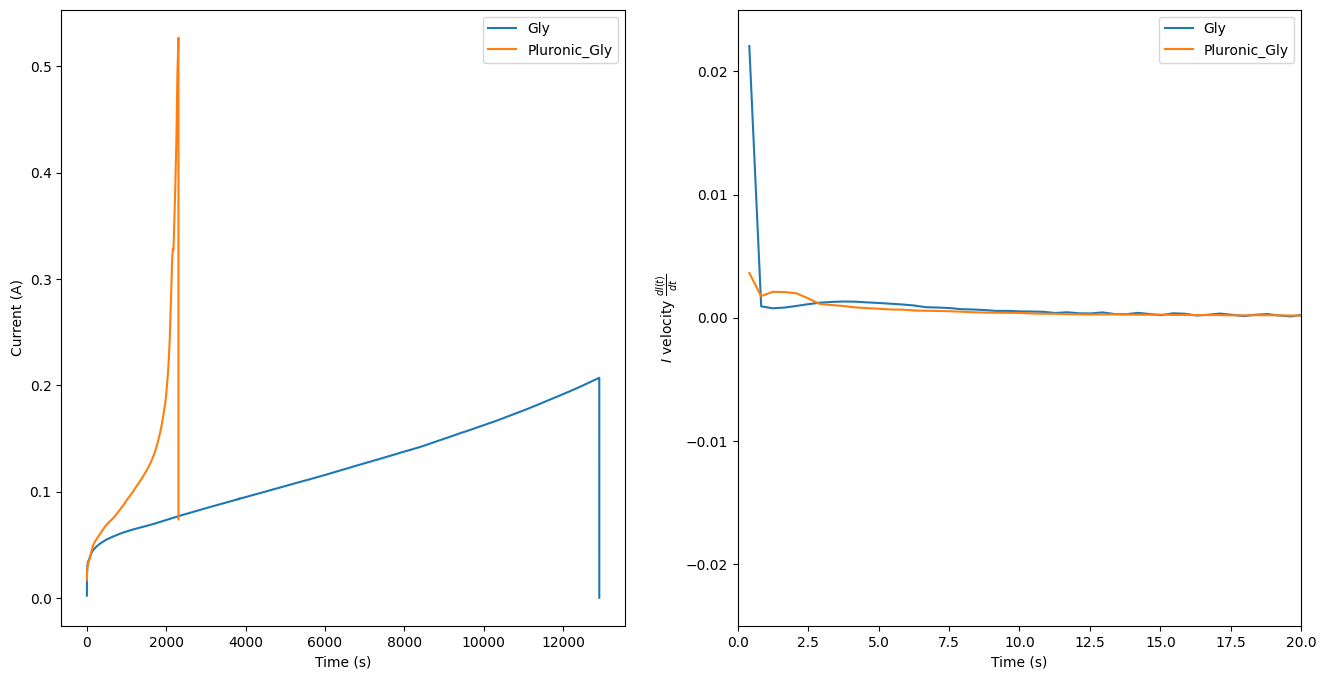

In [17]:
def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #数値が出てくるたびにテキストを分割　atoiと合わせて、数値の時は数値の値を返す関数になっている。

#データ読み込み#
DIR="/mnt/d/master_thesis_data/experment_data/movie_data/movie_data/data_for_test/"
Gly="/20231221_test_2ML_5Gly_6.98mPas_75.9mN_0001/20231221_test_2ML_5Gly_6.98mPas_75.9mN_0001.dat"
Pluronic_Gly="/20231224_2ML_0.05sur_5Gly_7.94mPas_66.7mN_0001/20231224_2ML_0.05sur_5Gly_7.94mPas_66.7mN_0001.dat"
data_list=[Gly,Pluronic_Gly]
legend_list=["Gly","Pluronic_Gly"]

fig,ax=plt.subplots(1,2,figsize=(16,8))
for i in range(len(data_list)):
    data=np.loadtxt(DIR+data_list[i],usecols=[0,1,2,3,4])

    #変数データ取得#
    time=data[:,0]-data[0,0]
    DCI=data[:,1]
    delta_q=data[:,3]
    q_total=data[:,4]
    I_v=[(DCI[j+1]-DCI[j-1])/(time[j+1]-time[j-1]) for j in range(1,len(time)-1)]
    I_v_time=[time[j] for j in range(1,len(time)-1)]
    dt=[time[j+1]-time[j] for j in range(0,len(time)-1)]
    dt_ave=np.average(dt)
    print(dt_ave)

    #データプロット#
    ax[0].plot(time,DCI)
    ax[0].legend(legend_list)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Current (A)")
    
    ax[1].plot(I_v_time,I_v)
    ax[1].legend(legend_list)
    ax[1].set_xlabel("Time (s)")
    ax[1].set_ylabel(r"$I$ velocity $\frac{d I(t)}{d t}$")
    ax[1].set_ylim(-2.5e-2,2.5e-2)
    ax[1].set_xlim(0,20)
    
plt.show()

In [30]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #数値が出てくるたびにテキストを分割　atoiと合わせて、数値の時は数値の値を返す関数になっている。

DIR = '/mnt/d/dendrite_data/edited_data/housedolf_dim_data' #ディレクトリパス

print(sum(os.path.isfile(os.path.join(DIR, name)) for name in os.listdir(DIR)))#ディレクトリ内ファイル計測

C=[0 , 0.005 , 0.01 , 0.03 , 0.05] #濃度リスト

#データ取得　後でリスト内を書き換える形で読み込む。リストを書き換えるのがいいのかはわからん。最終的にこの名前通りのデータ配置になる。
data_list=["sur_0_dim_list","sur_0005_dim_list","sur_001_dim_list","sur_003_dim_list","sur_005_dim_list"]

for i in range(len(data_list)):
    if i ==0:
        data_list[i]=glob.glob(DIR+"/*_nonsur_*mN_No.*.dat")
        # print(data_list[i])
        for j in range(len(data_list[i])):
            print(j,data_list[i][j])
            tmp1=np.loadtxt(data_list[i][j])
            tmp2=data_list[i][j]
            data_list[i][j]=[C[i],tmp1,tmp2]
    else:
        data_list[i]=glob.glob(DIR+"/*_"+str(C[i])+"sur_*mN_No.*.dat")
        print(data_list[i])
        for j in range(len(data_list[i])):
            tmp1=np.loadtxt(data_list[i][j])
            tmp2=data_list[i][j]
            data_list[i][j]=[C[i],tmp1,tmp2]

#フラクタル次元の時間変化表示
label=["Time (s)",r"Fractal Dimnsion D$_{f}$"]
plt.rcParams["font.size"] = 15
color=["r","orange","gold","b","purple"]

fig, ax = plt.subplots()
#for i in range(len(data_list)):#i:各濃度
for i in [0]:#i:各濃度
    for j in range(len(data_list[i])):#j:各濃度の実験データナンバー(実験データ個数が最大値)
        ax.plot(data_list[i][j][1][:,0]*2,data_list[i][j][1][:,1],  color=color[i], label="")
    ax.plot(data_list[i][len(data_list[i])-1][1][:,0]*2,data_list[i][len(data_list[i])-1][1][:,1],  color=color[i], label=str(C[i])+"%")
    plt.legend()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Concentration")
ax.set_xlabel(label[0])
ax.set_ylabel(label[1])
ax.set_ylim(1.3,1.6)

#移動平均をとる
fig, ax = plt.subplots()
Con=[]
D_f=[]
for i in range(len(data_list)):#i:各濃度
    for j in range(len(data_list[i])):#j:各濃度の実験データナンバー(実験データ個数が最大値)
        #後ろ５個のデータで移動平均をとる
        df_tmp=np.convolve(data_list[i][j][1][:,1],np.ones(5)/5, mode='valid')
        t_tmp=[] 
        for k in range(0,len(data_list[i][j][1])-4):
            t_tmp.append((k+4)*30)

        ax.plot(t_tmp ,df_tmp,  color=color[i], label="")
        #ax.plot(data_list[i][j][1][:,0]*2,data_list[i][j][1][:,1],  color=cm(C[i]), label="")
        
    ax.plot(data_list[i][len(data_list[i])-1][1][:,0]*2,data_list[i][len(data_list[i])-1][1][:,1],  color=color[i], label=str(C[i])+"%")
    plt.legend()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Concentration")
ax.set_xlabel(label[0])
ax.set_ylabel(label[1])
ax.set_ylim(1.3,1.6)

plt.show


25
0 /mnt/d/dendrite_data/edited_data/housedolf_dim_data/20230205_nonsur_77.2mN_No.1.dat
1 /mnt/d/dendrite_data/edited_data/housedolf_dim_data/20230221_nonsur_76.6mN_No.2.dat


PermissionError: [Errno 13] Permission denied: '/mnt/d/dendrite_data/edited_data/housedolf_dim_data/20230221_nonsur_76.6mN_No.2.dat'

In [1]:
import math

import cv2
import matplotlib.pylab as pl
import numpy as np


def N_FrameImage(frameIndex):  # N番目のフレーム画像を返す
    # インデックスがフレームの範囲内なら…
    if frameIndex >= 0 and frameIndex < totalFrames:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frameIndex)
        ret, image = cap.read()
        return image
    else:
        return None


def center(n):  # 重心を返す,n=n0=n_initを入れる
    center = []

    for k in range(30):  # time=0からxフレーム分計算,x=30なのは経験と勘による。
        gray = cv2.cvtColor(N_FrameImage(n + k), cv2.COLOR_BGR2GRAY)
        # finding all the zero(black) pixels
        pixels = []
        for i in range(gray.shape[0]):
            for j in range(gray.shape[1]):
                if gray[i, j] > cut:
                    pixels.append((i, j))
        center.append(pl.mean(pixels, 0))  # 重心(平均値)の中央値なので、外れ値(チリ)の影響はあまりない...はず。

    center = np.array(center, dtype=int)

    return np.median(center, axis=0)


def n_init():  # ピクセル値を持つfirst frameを計算
    n = 0
    while 1:
        # making binary array
        gray = cv2.cvtColor(N_FrameImage(n), cv2.COLOR_BGR2GRAY)
        binary = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int8)

        for i in range(gray.shape[0]):
            for j in range(gray.shape[1]):
                if gray[i, j] > cut:
                    c_temp = 0
                    for k in range(5):
                        for l in range(5):
                            if (2 <= (j - 2 + l) < gray.shape[1] - 2) and (2 <= (i - 2 + k) < gray.shape[0] - 2) and (gray[i - 2 + k, j - 2 + l] > cut):
                                c_temp += 1

                    if c_temp <= dust:  # 周囲25マスの粒子数が(dust)個以下ならチリと判定。初めて値を持つフレームをn0=n_initにすると、他の計算でエラーが出る。(初期フレームは析出粒子が小さくチリとして判定され、結果的にまっさらな画像の判定になり、空配列の判定を行うことになってエラーが出る。)
                        binary[i, j] = 0
                    else:
                        binary[i, j] = 1

        if np.count_nonzero(binary == 1) > 0:
            break

        n += 1

    return n


# main function
g = "20230221_nonsur_76.6mN_No.2"  # ここを変えれば読み込みファイルを変えられる。読み込みはedited_movieから。
filename = "D:\dendrite_data\edited_data\edited_movie\ " +str(g) + ".avi"  # 黒地に白の画像 ファイル名を入れる


# filename = "/Volumes/HDPH-UT/dendrite_data/edited_data/edited_movie/" + str(g) + ".avi"  # 黒地に白の画像 ファイル名を入れる
cap = cv2.VideoCapture(filename)  # 動画読み込み
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)  # get total frame number of movie
dust = 4  # チリの大きさ判定用変数
cut = 30  # threshold value,輝度値は0が黒色、255が白色。思ったより画像が暗いので、白を取るときは割と大きめで。

n0 = n_init()  # origin frame number, time=0
n = n0  # time=0
K = 15  # distance of pick up frame,1フレームあたり2秒なので、30秒ごとに取っている
D = []
step = []

cutoff = (totalFrames - n0) / 2  # 動画の真ん中のフレーム
w = []  # 重みづけ関数

# calculate frontline

r_c = center(n0)
print(r_c)

while cap.isOpened():
    if n >= totalFrames:  # ＝がないと、ここは通るのに、N_FrameImageの条件を満たさず、grayの読み込みでエラーが出る。
        break

    s = 0  # 面積カウント用

    ret, image = cap.read()

    # making binary array
    gray = cv2.cvtColor(N_FrameImage(n), cv2.COLOR_BGR2GRAY)  # RGBの3次元情報を輝度値のみの1次元情報に変換
    binary = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int8)
    pixels = []
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            if gray[i, j] > cut:
                c_temp = 0
                for k in range(5):  # 1粒子あたり周囲25マスの探索で単純に時間は25倍になる。しんど。
                    for l in range(5):
                        if (2 <= (j - 2 + l) < gray.shape[1] - 2) and (2 <= (i - 2 + k) < gray.shape[0] - 2) and (gray[i - 2 + k, j - 2 + l] > cut):
                            c_temp += 1

                if c_temp > dust:  # 周囲25マスの粒子数が(dust)個より多ければ粒子と判定
                    pixels.append((i, j))

    Lx = gray.shape[1]
    Ly = gray.shape[0]
    pixels = pl.array(pixels)

    # computing the fractal dimension
    # considering only scales in a logarithmic list
    scales = np.logspace(
        1, 6, num=10, endpoint=False, base=2
    )  # parametaの組み合わせは考慮の余地あり。2^n~L/(6~8)(ボックス6~8個分)ぐらいまでがいい感じ？分割幅は増やせば精度が上がる時もあるし、ない時もある。ワカラン。ただ、(end)-1だとscaleが整数値になって、なぜか精度が落ちた。Sierpinski gasketで調査。
    Ns = []

    # looping over several scales
    for scale in scales:
        H, edges = np.histogramdd(pixels, bins=(np.arange(0, Lx, scale), np.arange(0, Ly, scale)))
        Ns.append(np.sum(H > 0))

    # linear fit, polynomial of degree 1
    coeffs = np.polyfit(np.log(scales), np.log(Ns), 1)
    d_f = -coeffs[0]  # Haussdorff dimension
    n += K
    D.append(d_f)
    step.append(n - n0)

    if n < cutoff:
        w.append(0)
    else:
        w.append(1)


time = pl.array(step)
dim = pl.array(D)
mean_D = np.average(D, weights=w)
print(mean_D)

f = open(
    "C:/Users/PC/Desktop/Master_Thesis/test/fractal_check.dat","w")
f.write("#scale" + "\t" + "#Box_num" + "\n")
for i in range(len(scales)):
    f.write(str(np.log(scales[i])) + "\t" + str(np.log(Ns[i])) + "\n")
f.close()

ModuleNotFoundError: No module named 'cv2'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

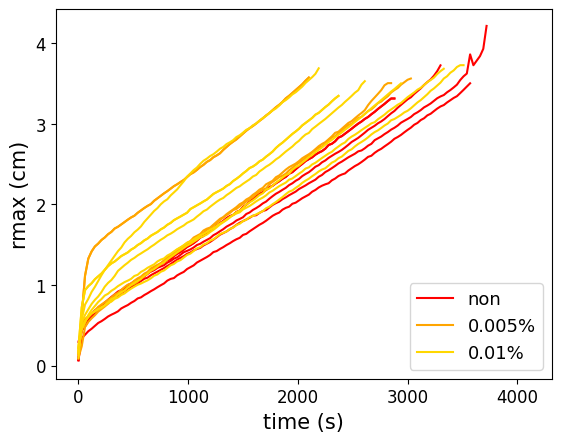

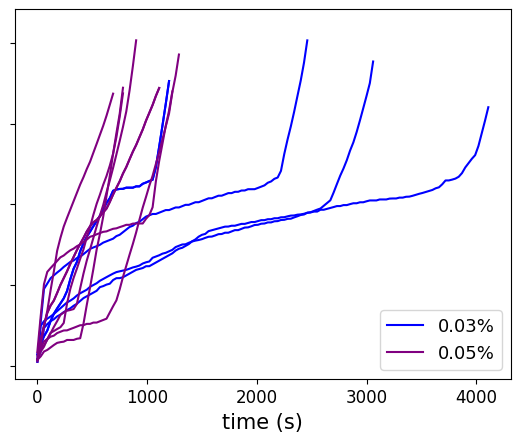

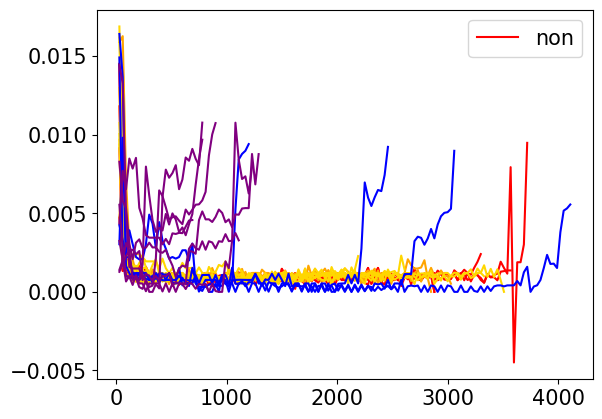

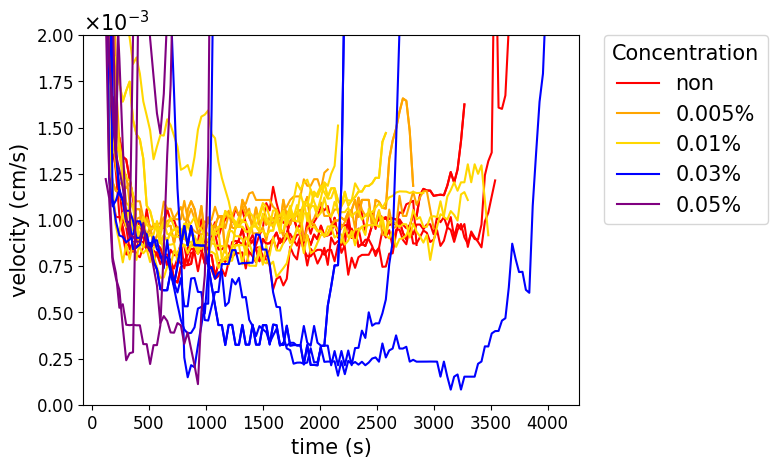

In [47]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num (pix)","branch_mean (pix)","branch_median (pix)"]
plt.rcParams["font.size"] = 15
#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median

unit=11/681 #単位はcm/pix
i=0
j=1

fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,color="r", label="")
ax.plot(fl[3][:,i]*2,fl[3][:,j]*unit,color="r", label="non")
plt.legend(fontsize=13)

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="orange", label="")
ax.plot(fl[4][:,i]*2,fl[4][:,j]*unit,color="orange", label="0.005%")
plt.legend(fontsize=13)

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="gold", label="")
ax.plot(fl[7][:,i]*2,fl[7][:,j]*unit,color="gold", label="0.01%")
plt.legend(fontsize=13)

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="b", label="",alpha=0)   #範囲を揃えて表示したいため、透明化している
#ax.plot(fl[21][:,i]*2,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend(fontsize=13)

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="purple", label="",alpha=0)
#ax.plot(fl[1][:,i]*2,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend(fontsize=13)

plt.tick_params(labelsize=12)
ax.set_xlabel(label[i])
ax.set_ylabel(label[j])

fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,color="r", label="",alpha=0)#範囲を揃えて表示したいため、透明化している
#ax.plot(fl[3][:,i]*2,fl[3][:,j]*unit,color="r", label="non")
plt.legend(fontsize=13)

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="orange", label="",alpha=0)
#ax.plot(fl[4][:,i]*2,fl[4][:,j]*unit,color="orange", label="0.005%")
plt.legend(fontsize=13)

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="gold", label="",alpha=0)
#ax.plot(fl[7][:,i]*2,fl[7][:,j]*unit,color="gold", label="0.01%")
plt.legend(fontsize=13)

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="b", label="")   
ax.plot(fl[21][:,i]*2,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend(fontsize=13)

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="purple", label="")
ax.plot(fl[1][:,i]*2,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend(fontsize=13)

plt.tick_params(labelsize=12)
ax.set_xlabel(label[i])
ax.tick_params(labelleft=False)
#ax.set_ylabel(label[j])



i=0
j=1
v=[[] for i in range(25)]
fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],color="r", label="")
ax.plot(v[3][:,i],v[3][:,j],color="r", label="non")
plt.legend()

for k in [4,5,6]: #0.005%sur
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],  color="orange", label="")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],  color="gold", label="")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],color="b", label="")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],  color="purple", label="")
plt.legend()

#移動平均をとる
fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)#4を足すのは、初めの4つは移動平均の計算で弾かれてしまうため、実質的な時間が5行目からなので
    ax.plot(t_tmp ,v_tmp,  color="r", label="")
ax.plot(t_tmp ,v_tmp,  color="r", label="non")
plt.legend(fontsize=13)

for k in [4,5,6]: #0.005%sur
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="orange", label="")
ax.plot(t_tmp ,v_tmp,  color="orange", label="0.005%")
plt.legend(fontsize=13)

for k in [7,8,12,13,17,18]: #0.01%sur
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="gold", label="")
ax.plot(t_tmp ,v_tmp,  color="gold", label="0.01%")
plt.legend(fontsize=13)

for k in [21,22,23,24]: #0.03%sur
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="b", label="")
ax.plot(t_tmp ,v_tmp,  color="b", label="0.03%")
plt.legend(fontsize=13)

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="purple", label="")
ax.plot(t_tmp ,v_tmp,  color="purple", label="0.05%")
plt.legend(fontsize=13)

plt.tick_params(labelsize=12)
ax.set_xlabel("time (s)")
ax.set_ylabel("velocity (cm/s)")  
ax.set_ylim(0,0.002)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Concentration")
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))   # 10^3（10の3乗）単位にする。

plt.show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

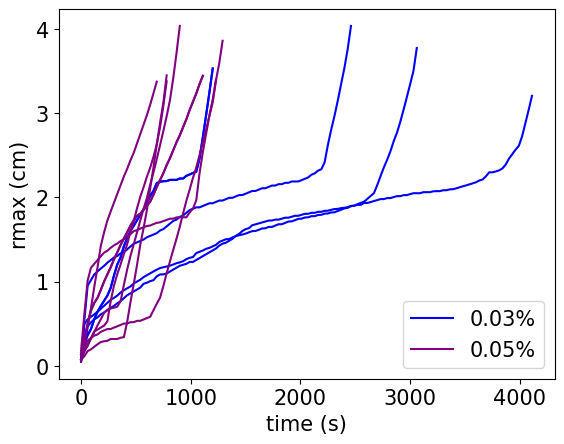

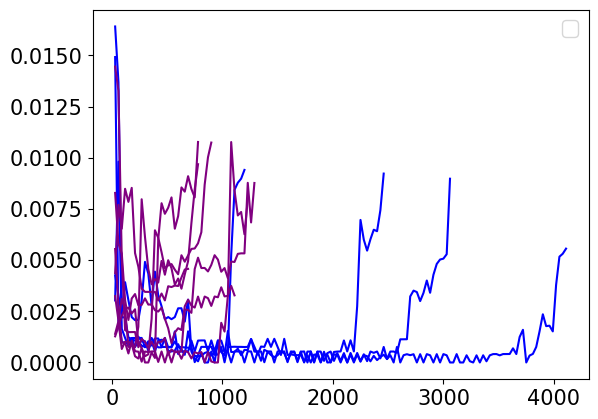

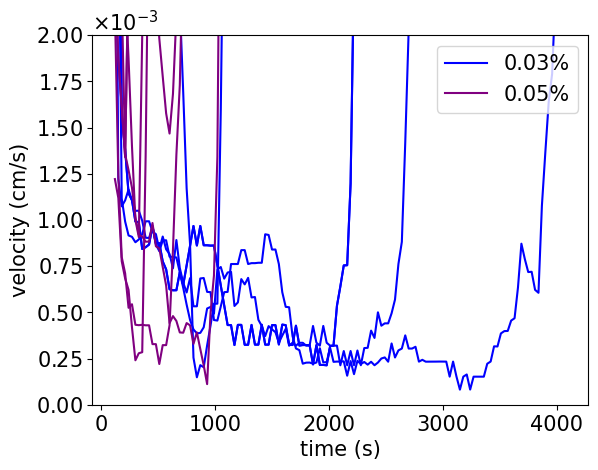

In [9]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num ","branch_mean (pix)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median

unit=11/681 #単位はcm/pix
i=0
j=1

fig, ax = plt.subplots()
for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="b", label="")   
ax.plot(fl[21][:,i]*2,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="purple", label="")
ax.plot(fl[1][:,i]*2,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend()

ax.set_xlabel(label[i])
ax.set_ylabel(label[j])

i=0
j=1
v=[[] for i in range(25)]
fig, ax = plt.subplots()
for k in [21,22,23,24]: #0.03%sur
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],color="b", label="")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],  color="purple", label="")
plt.legend()

#移動平均をとる
fig, ax = plt.subplots()
for k in [21,22,23,24]: #0.03%sur
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="b", label="")
ax.plot(t_tmp ,v_tmp,  color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="purple", label="")
ax.plot(t_tmp ,v_tmp,  color="purple", label="0.05%")
plt.legend()
    
ax.set_xlabel("time (s)")
ax.set_ylabel("velocity (cm/s)")  
ax.set_ylim(0,0.002)

ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))   # 10^3（10の3乗）単位にする。

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

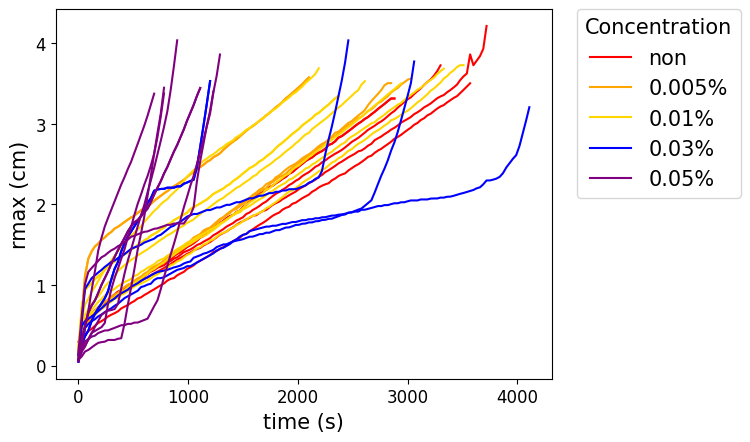

In [6]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num (pix)","branch_mean (pix)","branch_median (pix)"]
plt.rcParams["font.size"] = 15

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median
unit=11/681 #単位はcm/pix
i=0
j=1
fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,color="r", label="")
ax.plot(fl[3][:,i]*2,fl[3][:,j]*unit,color="r", label="non")
plt.legend(fontsize=13)

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="orange", label="")
ax.plot(fl[4][:,i]*2,fl[4][:,j]*unit,color="orange", label="0.005%")
plt.legend(fontsize=13)

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="gold", label="")
ax.plot(fl[7][:,i]*2,fl[7][:,j]*unit,color="gold", label="0.01%")
plt.legend(fontsize=13)

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="b", label="")   
ax.plot(fl[21][:,i]*2,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend(fontsize=13)

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="purple", label="")
ax.plot(fl[1][:,i]*2,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend(fontsize=13)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Concentration")
plt.tick_params(labelsize=12)
ax.set_xlabel(label[i])
ax.set_ylabel(label[j])
        
plt.show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

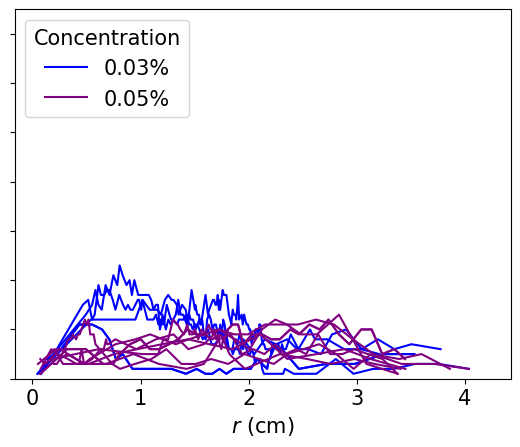

In [11]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","$\it{r}$ (cm)","area(pix)","branch_num ","branch_mean (pix)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median
unit=11/681 #単位はcm/pix
i=1
j=3
fig, ax = plt.subplots()


for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],color="r", label="",alpha=0)
#ax.plot(fl[3][:,i]*unit,fl[3][:,j],color="r", label="non")
plt.legend()

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="orange", label="",alpha=0)
#ax.plot(fl[4][:,i]*unit,fl[4][:,j],color="orange", label="0.005%")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="gold", label="",alpha=0)
#ax.plot(fl[7][:,i]*unit,fl[7][:,j],color="gold", label="0.01%")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="b", label="")   
ax.plot(fl[21][:,i]*unit,fl[21][:,j],color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="purple", label="")
ax.plot(fl[1][:,i]*unit,fl[1][:,j],color="purple", label="0.05%")
plt.legend()



ax.set_xlabel(label[i])
ax.tick_params(labelleft=False)
#ax.set_ylabel(label[j])
ax.set_ylim(0,75)
        

plt.legend(title="Concentration")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

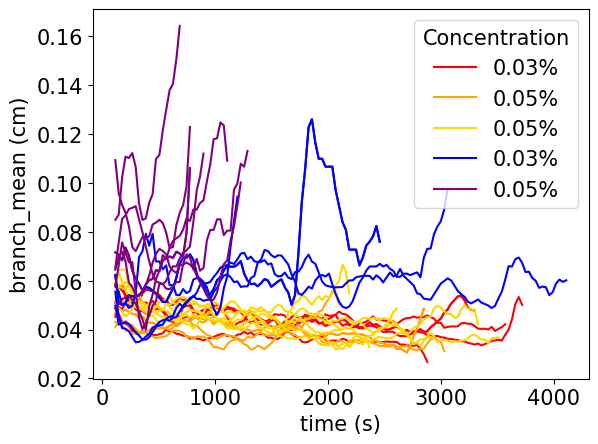

In [12]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num ","branch_mean (cm)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median

unit=11/681 #単位はcm/pix
i=4 #何について移動平均をとるか

#結局のところr-meanじゃね？
#移動平均をとる

fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4): #-4なのは次元数を合わせるため
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="r", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="r", label="0.03%")
plt.legend()

for k in [4,5,6]: #0.005%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="orange", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="orange", label="0.05%")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="gold", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="gold", label="0.05%")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="b", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="purple", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="purple", label="0.05%")
plt.legend()
    
ax.set_xlabel("time (s)")
ax.set_ylabel("branch_mean (cm)")  


#ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
#ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))   # 10^3（10の3乗）単位にする。

plt.legend(title="Concentration")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

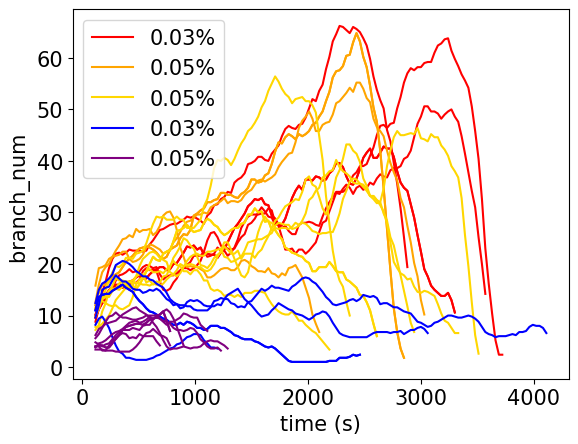

In [13]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num ","branch_mean (pix)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median

unit=11/681 #単位はcm/pix
i=3 #何について移動平均をとるか
#時間について本数やメジアン取るのはあまり意味がなさそう。半径横軸の方がいい感じ。meanならアリかも

#移動平均をとる

fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4): #-4なのは次元数を合わせるため
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="r", label="")
ax.plot(t_tmp ,fl_tmp,  color="r", label="0.03%")
plt.legend()

for k in [4,5,6]: #0.005%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="orange", label="")
ax.plot(t_tmp ,fl_tmp,  color="orange", label="0.05%")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="gold", label="")
ax.plot(t_tmp ,fl_tmp,  color="gold", label="0.05%")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="b", label="")
ax.plot(t_tmp ,fl_tmp,  color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="purple", label="")
ax.plot(t_tmp ,fl_tmp,  color="purple", label="0.05%")
plt.legend()
    
ax.set_xlabel("time (s)")
ax.set_ylabel(label[i])  


#ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
#ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))   # 10^3（10の3乗）単位にする。

plt.legend()
plt.show

/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_1977/3522985503.py:52: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="r", label="")
/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_1977/3522985503.py:60: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="orange", label="")
/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_1977/3522985503.py:68: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="gold", label="")
/var/folders/dr/w0l5z4j55119s6104f7

<function matplotlib.pyplot.show(close=None, block=None)>

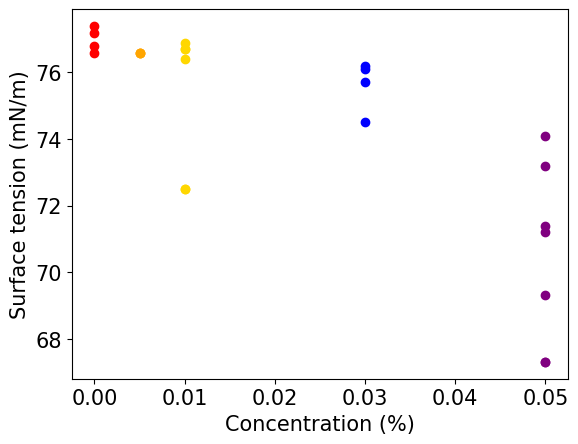

In [153]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
C=[0 , 0.005 , 0.01 , 0.03 , 0.05] #濃度リスト

label=[r"time ($\times$2 s)","rmax (pix)","area(pix)","branch_num (pix)","branch_mean (pix)","branch_median (pix)","Concentration (%)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median,6=surfactant_concentration


    


fig, ax = plt.subplots()

#nonsur
tension=[77.2,76.6,76.8,77.4]
tension=np.array(tension)
tension=tension.reshape([4,1])
c=np.full((4,1),C[0])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="r", label="")

#0.005%sur
tension=[76.6,76.6,76.6]
tension=np.array(tension)
tension=tension.reshape([3,1])
c=np.full((3,1),C[1])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="orange", label="")

#0.01%
tension=[72.5,72.5,76.4,76.7,76.7,76.9]
tension=np.array(tension)
tension=tension.reshape([6,1])
c=np.full((6,1),C[2])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="gold", label="")
    
#0.03%sur
tension=[74.5,75.7,76.1,76.2]
tension=np.array(tension)
tension=tension.reshape([4,1])
c=np.full((4,1),C[3])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="b", label="")
     
#0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    
tension=[67.3,67.3,69.3,71.4,71.2,73.2,74.1]
tension=np.array(tension)
tension=tension.reshape([7,1])
c=np.full((7,1),C[4])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="purple", label="")
    


ax.set_xlabel("Concentration (%)")
ax.set_ylabel("Surface tension (mN/m)")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

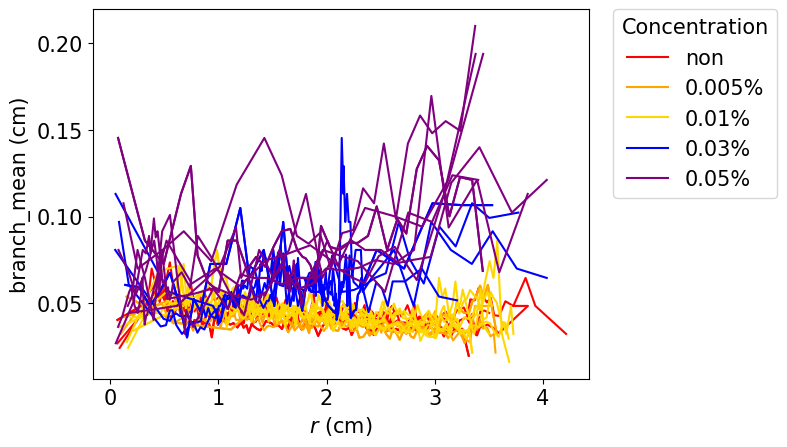

In [23]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","$\it{r}$ (cm)","area(pix)","branch_num ","branch_mean (cm)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median
unit=11/681 #単位はcm/pix
i=1
j=4
fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,color="r", label="")
ax.plot(fl[3][:,i]*unit,fl[3][:,j]*unit,color="r", label="non")
plt.legend()

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,  color="orange", label="")
ax.plot(fl[4][:,i]*unit,fl[4][:,j]*unit,color="orange", label="0.005%")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,  color="gold", label="")
ax.plot(fl[7][:,i]*unit,fl[7][:,j]*unit,color="gold", label="0.01%")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,  color="b", label="")
ax.plot(fl[21][:,i]*unit,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,  color="purple", label="")
ax.plot(fl[1][:,i]*unit,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend()



ax.set_xlabel(label[i])
ax.set_ylabel(label[j])
        
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Concentration")
plt.show

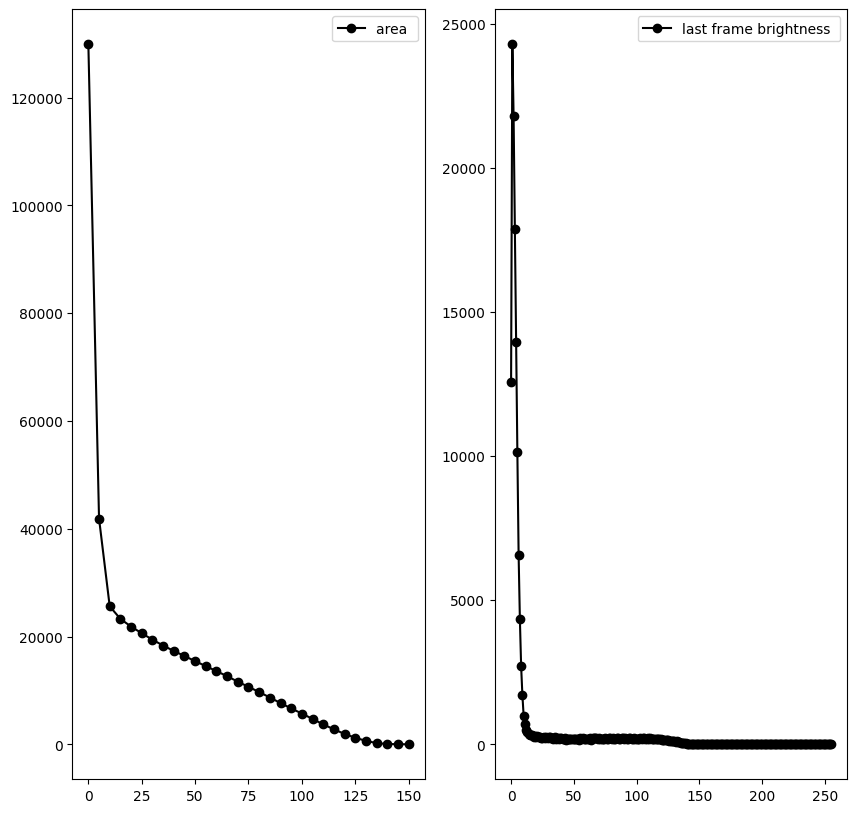

In [42]:
cutoff = np.loadtxt("test_cutoff.dat")
bright=np.loadtxt("test_brightness.dat")

fig = plt.figure(figsize=(10,10))
fl1 = fig.add_subplot(121)
fl1.plot(cutoff[:,0],cutoff[:,1], "o-", color="k", label="area ")#cutoffを変えた時の最後のフレームの面積
#plt.xlim(5, 100)
plt.legend()

fl2 = fig.add_subplot(122)
fl2.plot(bright[:,0],bright[:,1], "o-", color="k", label="last frame brightness ")#最終フレームの輝度値
#plt.xlim(120,165)
plt.legend()
plt.show()

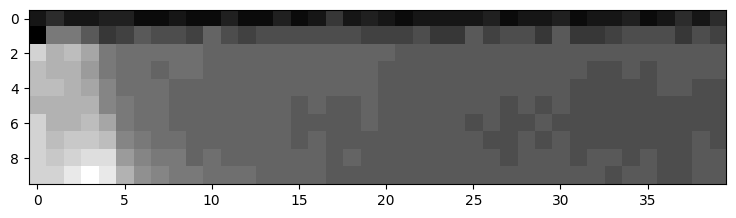

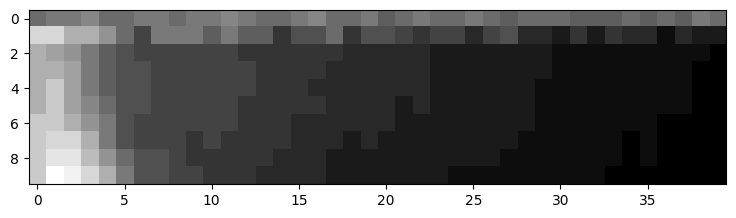

In [115]:
center0 = np.loadtxt("test_center0.dat")

# カラーマップ作成
fig = plt.figure(figsize=(9, 9))
plt.imshow(center0, cmap="gray")
plt.show()
#fig.savefig("./densim_plot/" + pr + ".png")

center1 = np.loadtxt("test_center1.dat")

# カラーマップ作成
fig = plt.figure(figsize=(9, 9))
plt.imshow(center1, cmap="gray")
plt.show()
#fig.savefig("./densim_plot/" + pr + ".png")
plt.close()

In [126]:
#以下備忘録兼ゴミおきば

#fig,ax=plt.subplots()
#vmin=-1, vmax=1, c=y, cmap=cm.seismic

#以下色分けできるコード
#color=[67.3 , 67.3 , 67.3 , 77.2 ,76.6 ,76.6 , 76.6 , 72.5 , 71.4 , 71.2 , 71.4]　 #色分け用配列
"""
label=["time ","rmax","area","branch_num","branch_mean","branch_median"]


ax.set(xlim=(0,1600),ylim=(0,24000),xlabel=label[i],ylabel=label[j])
#xlim=(0,1600),ylim=(0,24000),
x=[]
y=[]
for k in fl:
    x.append(k[:,i])
    y.append(k[:,j])
lc=multiline(x,y,color,ax=ax,cmap="viridis")
axcb=fig.colorbar(lc,ax=ax)
#ax.plot(fl4[:,i],fl4[:,j], "o-", color="m", label=" ")
#plt.set_xlabel(label[0])
#plt.


"""
#plt.legend()


iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [ ]:
"""
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24]

fig, ax = plt.subplots()


for k in [3,14,15,16]: #nonsur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")
    
for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")
    
for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")   

for k in [0,1,2,9,10,11,19,20]: #0.05%sur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")   

    

#nonsur
ax.plot(fl3[:,i],fl3[:,j], "o-", color="c", label="")

ax.plot(fl14[:,i],fl14[:,j], "o-", color="c", label=" ")
ax.plot(fl15[:,i],fl15[:,j], "o-", color="c", label=" ")
ax.plot(fl16[:,i],fl16[:,j], "o-", color="c", label="")


#0.005%sur
ax.plot(fl4[:,i],fl4[:,j], "o-", color="b", label=" ")
ax.plot(fl5[:,i],fl5[:,j], "o-", color="b", label="")
ax.plot(fl6[:,i],fl6[:,j], "o-", color="b", label=" ")

#0.01%sur
ax.plot(fl7[:,i],fl7[:,j], "o-", color="r", label="")
ax.plot(fl8[:,i],fl8[:,j], "o-", color="r", label=" ")

ax.plot(fl12[:,i],fl12[:,j], "o-", color="r", label="")
ax.plot(fl13[:,i],fl13[:,j], "o-", color="r", label=" ")

ax.plot(fl17[:,i],fl17[:,j], "o-", color="r", label=" ")
ax.plot(fl18[:,i],fl18[:,j], "o-", color="r", label=" ")

#0.03%sur
ax.plot(fl21[:,i],fl21[:,j], "o-", color="m", label=" ")
ax.plot(fl22[:,i],fl22[:,j], "o-", color="m", label="")
ax.plot(fl23[:,i],fl23[:,j], "o-", color="m", label=" ")
ax.plot(fl24[:,i],fl24[:,j], "o-", color="m", label=" ")

#0.05%sur
ax.plot(fl0[:,i],fl0[:,j], "o-",color="k", label=" ")
ax.plot(fl1[:,i],fl1[:,j], "o-", color="k", label="")
ax.plot(fl2[:,i],fl2[:,j], "o-", color="k", label=" ")

ax.plot(fl9[:,i],fl9[:,j], "o-", color="k", label="")
ax.plot(fl10[:,i],fl10[:,j], "o-", color="k", label=" ")
ax.plot(fl11[:,i],fl11[:,j], "o-", color="k", label=" ")

ax.plot(fl19[:,i],fl19[:,j], "o-", color="k", label="")
ax.plot(fl20[:,i],fl20[:,j], "o-", color="k", label=" ")



label=[r"time ($\times$0.5 min)","rmax (pix)","areapix","branch_num (pix)","branch_mean (pix)","branch_median (pix)"]
ax.set_xlabel(label[i])
ax.set_ylabel(label[j])

"""


In [ ]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
C=[0 , 0.005 , 0.01 , 0.03 , 0.05] #濃度リスト

label=[r"time ($\times$2 s)","rmax (pix)","area(pix)","branch_num (pix)","branch_mean (pix)","branch_median (pix)","Concentration (%)"]

#表示する値,0=time, 1=rmax, 2=area, 3=branch_num, 4=branch_mean, 5=branch_median, 6=surfactant_concentration
#sec=250
i=6
j=3
#t=int(sec/15)   

#for t in range(0,)

for t in range(1,137,15):  
    fig, ax = plt.subplots()
    for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[0])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j],"o-",color="c", label="")

    for k in [4,5,6]: #0.005%sur
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[1])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j], "o-", color="b", label="")

    for k in [7,8,12,13,17,18]: #0.01%sur
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[2])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j],  "o-",color="r", label="")

    for k in [21,22,23,24]: #0.03%sur
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[3])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j], "o-", color="m", label="")   

    for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[4])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j],  "o-",color="k", label="")
            
    sec=t*15
    ax.set_xlabel(label[i])
    ax.set_ylabel(label[j])
    ax.set_title("t="+str(sec) +"s")

plt.legend()
plt.show